###***Data preparation***###



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import numpy as np
import kagglehub
from sklearn.utils import resample
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/network-slicing-recognition")

df = pd.read_csv(f"{path}/train_dataset.csv") #we will use the train_dataset as the full dataset and split it in the upcoming steps

100%|██████████| 250k/250k [00:00<00:00, 41.0MB/s]

Extracting files...


In [3]:
print(f"train dataset shape : {df.shape}\n")
df.head(5)

train dataset shape : (31583, 17)



,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


###***Basic information related to the dataset:***###

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31583 entries, 0 to 31582
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       31583 non-null  int64  
 1   Time                  31583 non-null  int64  
 2   Packet Loss Rate      31583 non-null  float64
 3   Packet delay          31583 non-null  int64  
 4   IoT                   31583 non-null  int64  
 5   LTE/5G                31583 non-null  int64  
 6   GBR                   31583 non-null  int64  
 7   Non-GBR               31583 non-null  int64  
 8   AR/VR/Gaming          31583 non-null  int64  
 9   Healthcare            31583 non-null  int64  
 10  Industry 4.0          31583 non-null  int64  
 11  IoT Devices           31583 non-null  int64  
 12  Public Safety         31583 non-null  int64  
 13  Smart City & Home     31583 non-null  int64  
 14  Smart Transportation  31583 non-null  int64  
 15  Smartphone         

As shown in the above information, there are no NaN values.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LTE/5g Category,31583.0,10.974923,6.053641,1.000000,6.000000,11.000,16.00,22.00
Time,31583.0,11.476459,6.915643,0.000000,6.000000,11.000,17.00,23.00
Packet Loss Rate,31583.0,0.003079,0.004344,0.000001,0.000001,0.001,0.01,0.01
Packet delay,31583.0,114.126745,106.320976,10.000000,50.000000,75.000,150.00,300.00
IoT,31583.0,0.468100,0.498989,0.000000,0.000000,0.000,1.00,1.00
LTE/5G,31583.0,0.531900,0.498989,0.000000,0.000000,1.000,1.00,1.00
GBR,31583.0,0.441187,0.496537,0.000000,0.000000,0.000,1.00,1.00
Non-GBR,31583.0,0.558813,0.496537,0.000000,0.000000,1.000,1.00,1.00
AR/VR/Gaming,31583.0,0.106291,0.308215,0.000000,0.000000,0.000,0.00,1.00
Healthcare,31583.0,0.057943,0.233639,0.000000,0.000000,0.000,0.00,1.00


In [6]:
df.nunique()

,0
LTE/5g Category,22
Time,24
Packet Loss Rate,3
Packet delay,7
IoT,2
LTE/5G,2
GBR,2
Non-GBR,2
AR/VR/Gaming,2
Healthcare,2


we can deduct that the dataset fall under classification.

###***EXPLORATORY DATA ANALYSIS (EDA):***###

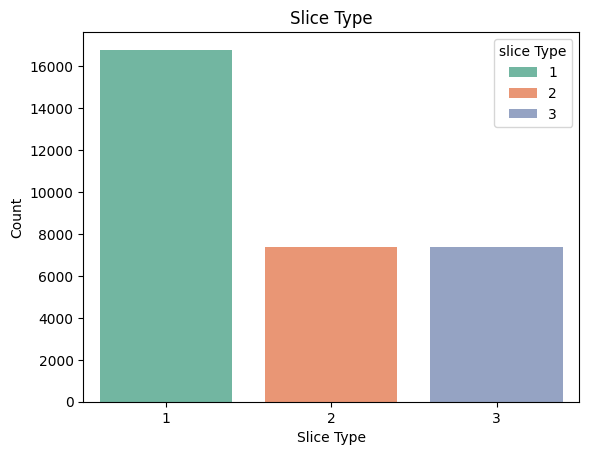

In [7]:
sns.countplot(x='slice Type', data=df, hue='slice Type', palette='Set2')
plt.title('Slice Type')
plt.xlabel('Slice Type')
plt.ylabel('Count')
plt.show()

As seen in the above bar chart, the data is unbalanced. In order to get a more accurate insights, we have down-sampled the dataset to get an evenly distributed dataset.

In [8]:
majority = df[df['slice Type'] == 1.0]
minority_1 = df[df['slice Type'] == 2.0]
minority_2 = df[df['slice Type'] == 3.0]
majority_downsampled = resample(majority, replace=False, n_samples=len(minority_2), random_state=42)

balanced_df = pd.concat([majority_downsampled, minority_1, minority_2])

print(balanced_df['slice Type'].value_counts())

slice Type
1    7392
2    7392
3    7392
Name: count, dtype: int64


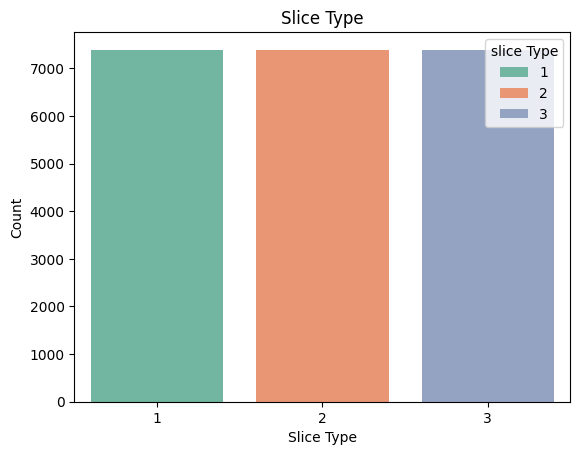

In [9]:
sns.countplot(x='slice Type', data=balanced_df, hue='slice Type', palette='Set2')
plt.title('Slice Type')
plt.xlabel('Slice Type')
plt.ylabel('Count')
plt.show()

In [10]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22176 entries, 9283 to 31582
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       22176 non-null  int64  
 1   Time                  22176 non-null  int64  
 2   Packet Loss Rate      22176 non-null  float64
 3   Packet delay          22176 non-null  int64  
 4   IoT                   22176 non-null  int64  
 5   LTE/5G                22176 non-null  int64  
 6   GBR                   22176 non-null  int64  
 7   Non-GBR               22176 non-null  int64  
 8   AR/VR/Gaming          22176 non-null  int64  
 9   Healthcare            22176 non-null  int64  
 10  Industry 4.0          22176 non-null  int64  
 11  IoT Devices           22176 non-null  int64  
 12  Public Safety         22176 non-null  int64  
 13  Smart City & Home     22176 non-null  int64  
 14  Smart Transportation  22176 non-null  int64  
 15  Smartphone           

In [11]:
balanced_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LTE/5g Category,22176.0,11.178526,6.165790,1.000000,6.000000,11.000,16.00,22.00
Time,22176.0,11.491748,6.916218,0.000000,6.000000,11.000,17.00,23.00
Packet Loss Rate,22176.0,0.003364,0.004514,0.000001,0.000001,0.001,0.01,0.01
Packet delay,22176.0,105.970869,112.480688,10.000000,10.000000,50.000,150.00,300.00
IoT,22176.0,0.666667,0.471415,0.000000,0.000000,1.000,1.00,1.00
LTE/5G,22176.0,0.333333,0.471415,0.000000,0.000000,0.000,1.00,1.00
GBR,22176.0,0.416892,0.493056,0.000000,0.000000,0.000,1.00,1.00
Non-GBR,22176.0,0.583108,0.493056,0.000000,0.000000,1.000,1.00,1.00
AR/VR/Gaming,22176.0,0.067280,0.250512,0.000000,0.000000,0.000,0.00,1.00
Healthcare,22176.0,0.082522,0.275164,0.000000,0.000000,0.000,0.00,1.00


In [12]:
balanced_df.nunique()

,0
LTE/5g Category,22
Time,24
Packet Loss Rate,3
Packet delay,7
IoT,2
LTE/5G,2
GBR,2
Non-GBR,2
AR/VR/Gaming,2
Healthcare,2


Plotting the histograms and PDF of the features:

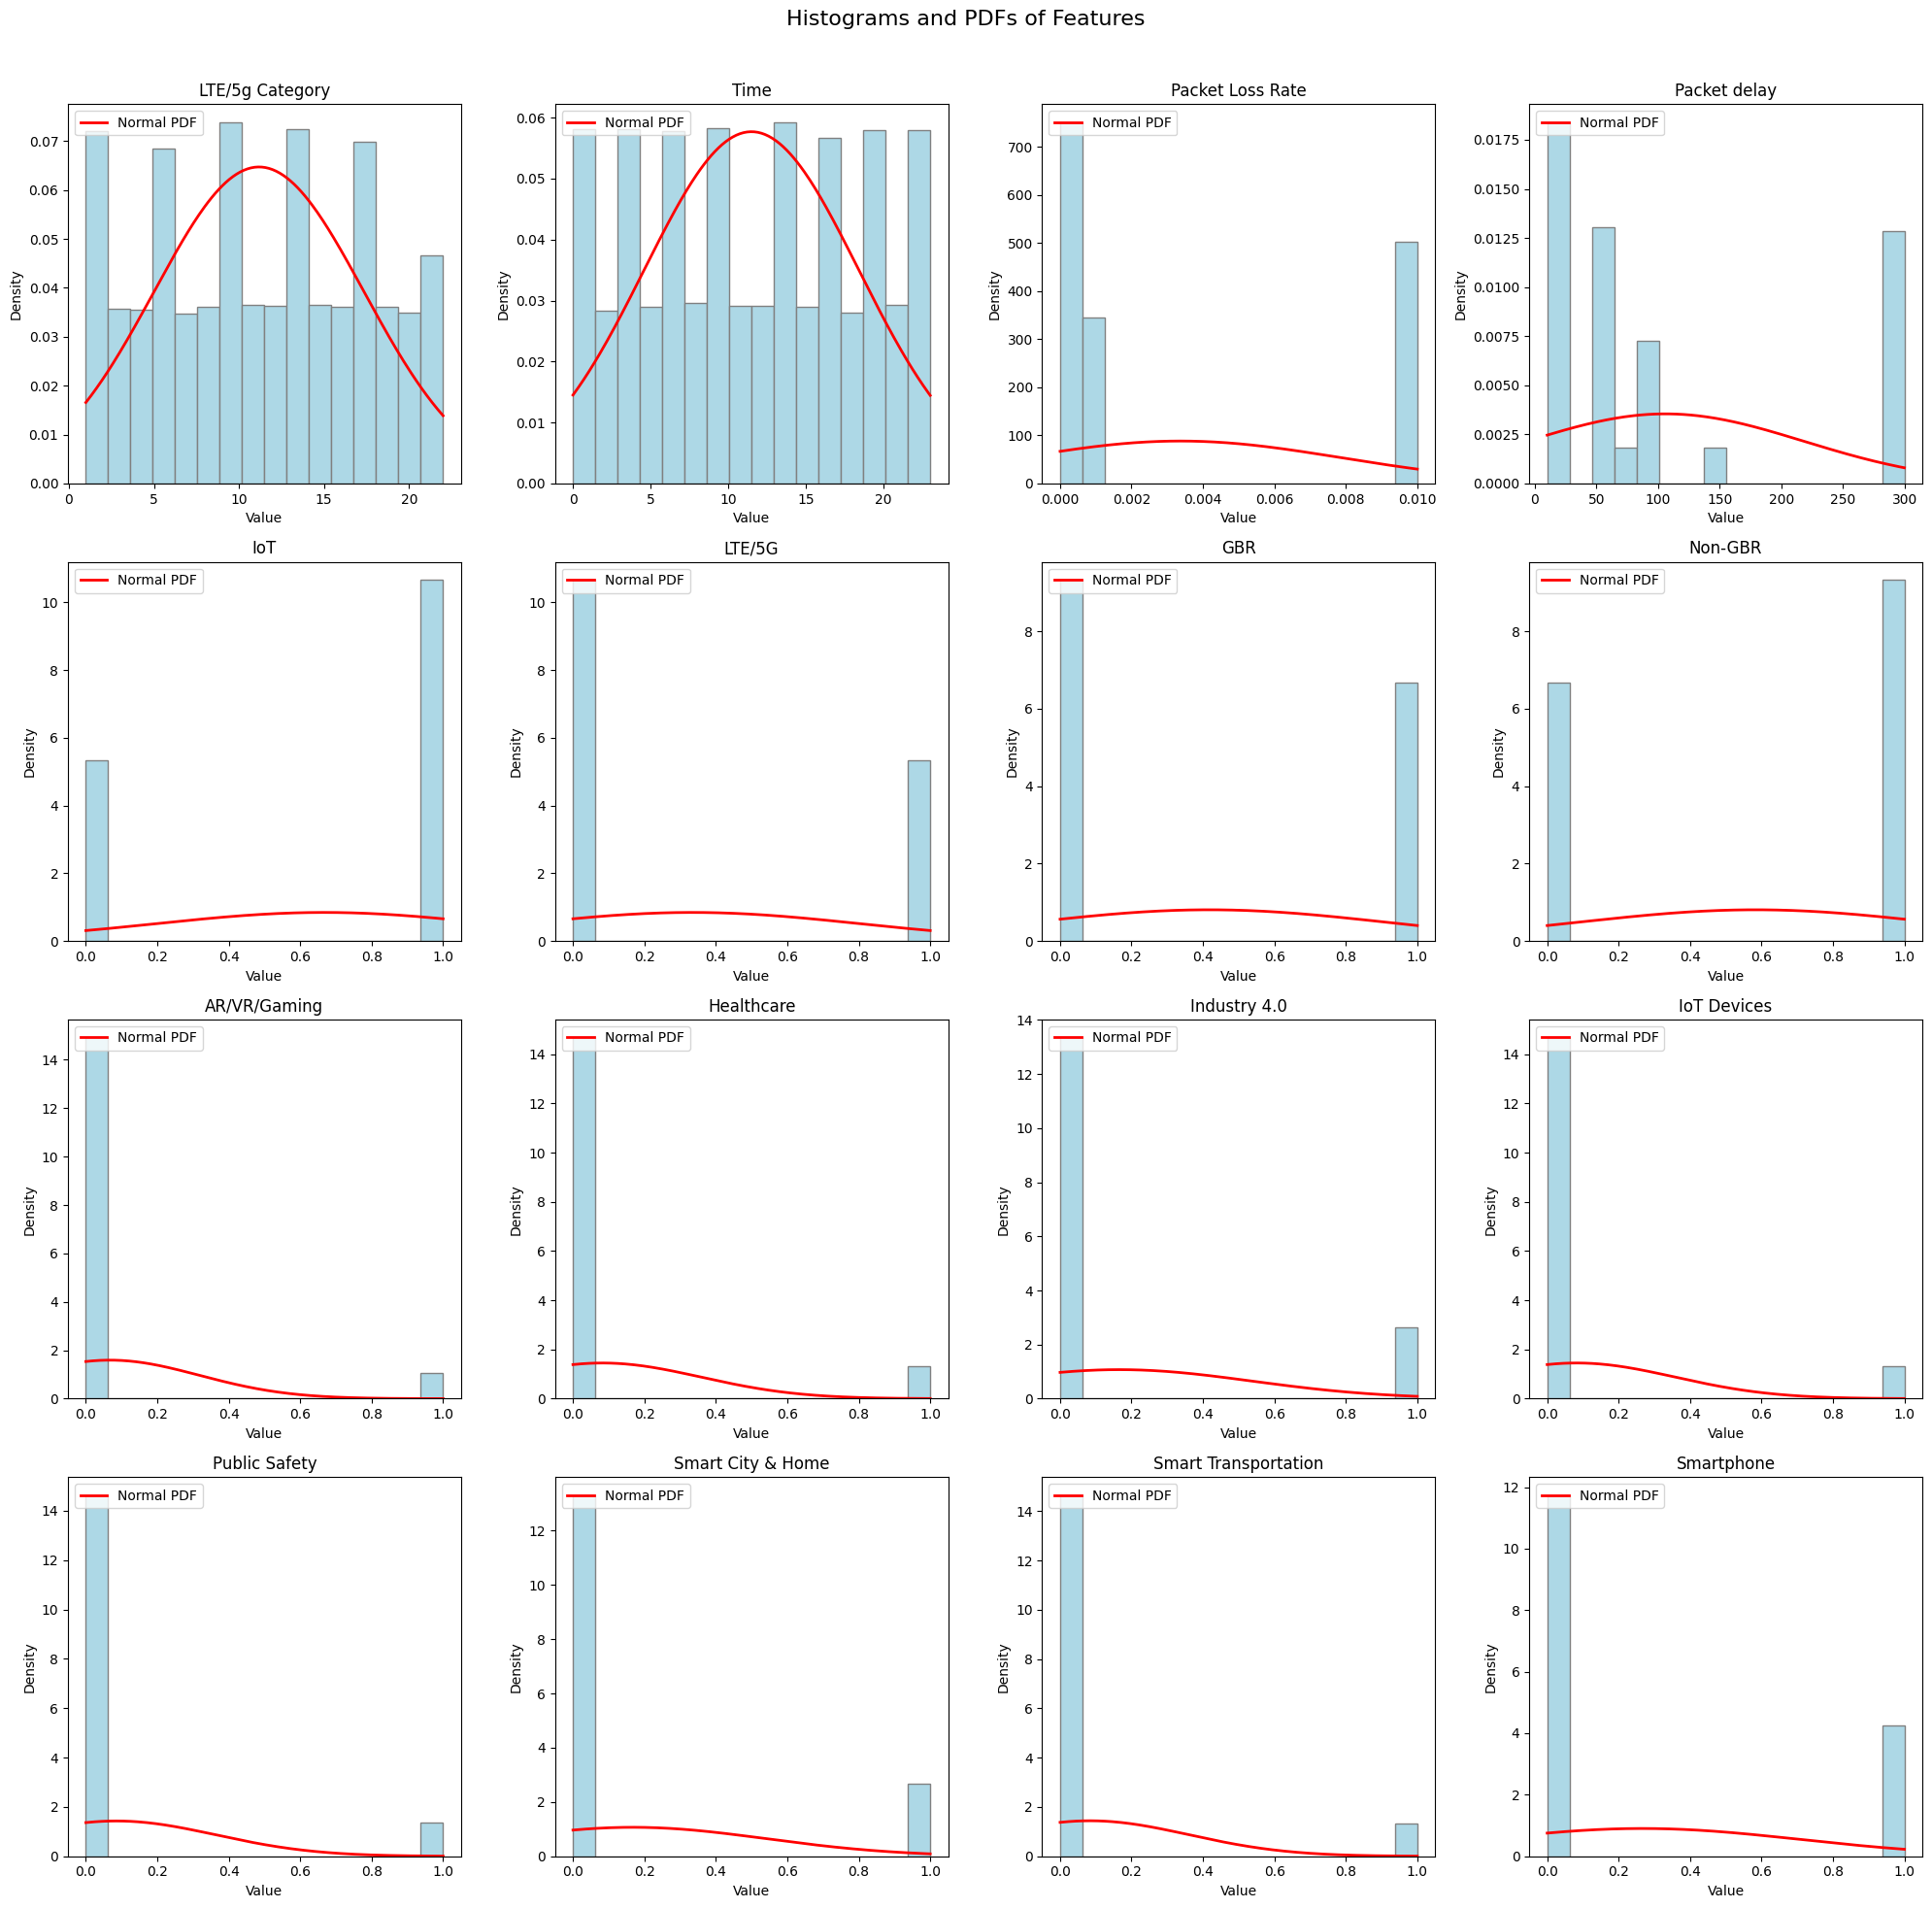

In [13]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 4x4 grid
axes = axes.flatten()

# Loop through each column and generate the plots
for idx, col in enumerate(balanced_df.columns):
    if col == 'slice Type':
        continue

    # Calculate PDF using stats.norm
    mu, sigma = balanced_df[col].mean(), balanced_df[col].std()  # Calculate mean and standard deviation
    rv = stats.norm(mu, sigma)
    x_rv = np.linspace(balanced_df[col].min(), balanced_df[col].max(), 200)  # Range for PDF
    fx = rv.pdf(x_rv)

    # Plot the histogram and PDF
    ax = axes[idx]
    ax.hist(balanced_df[col], bins=16, color='lightblue', edgecolor='grey', density=True)
    ax.plot(x_rv, fx, color='r', linewidth=2, label='Normal PDF')
    ax.set_title(f'{col}', fontsize=12)
    ax.legend(loc='upper left')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)

# Remove any unused subplots
for idx in range(len(balanced_df.columns), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
plt.suptitle('Histograms and PDFs of Features', fontsize=16)
plt.show()


***LTE/5g Category:***

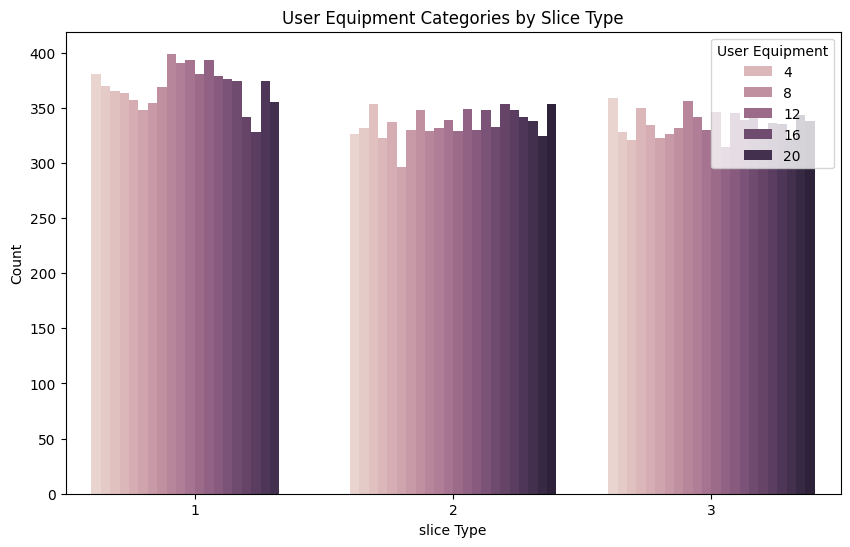

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='slice Type', hue='LTE/5g Category')
plt.title("User Equipment Categories by Slice Type")
plt.xlabel("slice Type")
plt.ylabel("Count")
plt.legend(title="User Equipment")
plt.show()

In [15]:
# Group by Slice Type and count the LTE/5G category values
lte_5g_distribution = balanced_df.groupby('slice Type')['LTE/5g Category'].nunique()

print(lte_5g_distribution)

slice Type
1    20
2    22
3    22
Name: LTE/5g Category, dtype: int64


we can observe from the unique values above that LTE/5g cateogry are not all present in slice 1.

***Packet Loss Rate:***

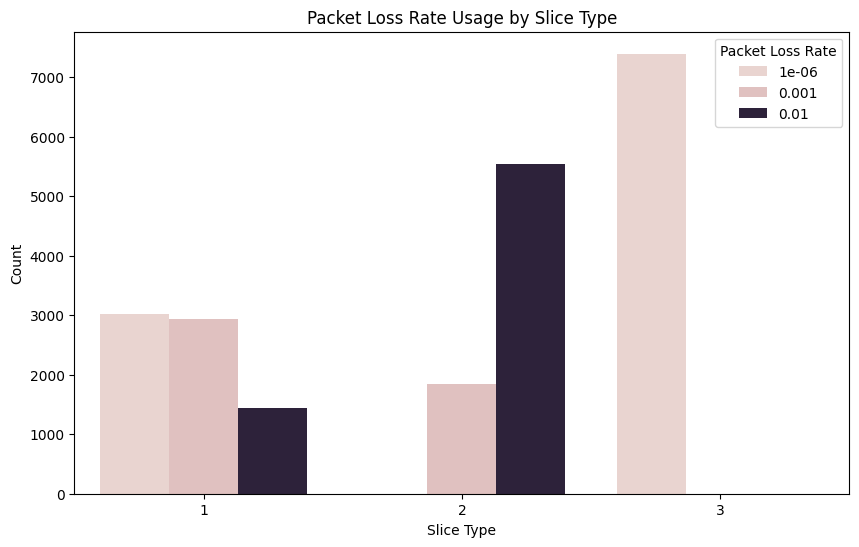

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='slice Type', hue='Packet Loss Rate')
plt.title("Packet Loss Rate Usage by Slice Type")
plt.xlabel("Slice Type")
plt.ylabel("Count")
plt.legend(title="Packet Loss Rate")
plt.xticks()
plt.show()

Slice Type 3 demonstrates the lowest average packet loss rate compared to other slice types, as shown in the statistical analysis and visualized in the countplot. Therefore, Slice Type 3 is most suitable for services requiring high reliability and low packet loss, such as healthcare applications, Industry 4.0, or public safety systems

***Packet delay:***

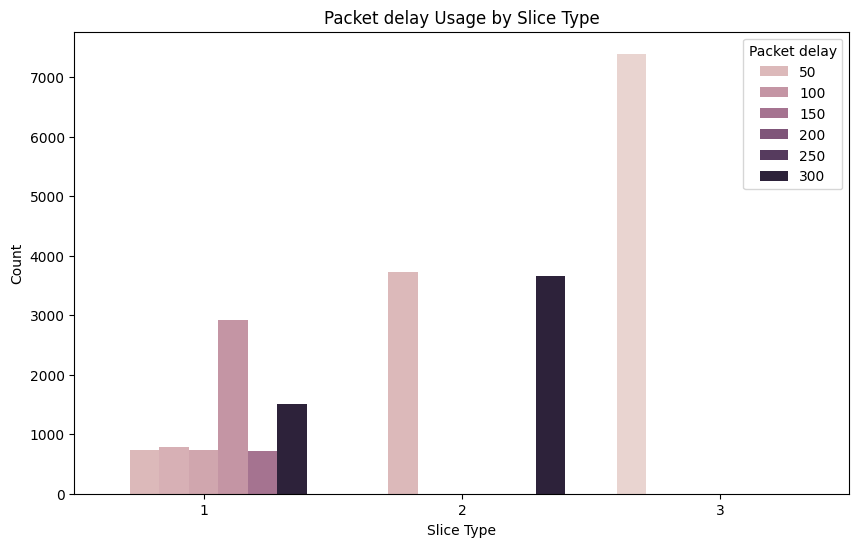

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='slice Type', hue='Packet delay')
plt.title("Packet delay Usage by Slice Type")
plt.xlabel("Slice Type")
plt.ylabel("Count")
plt.xticks()
plt.show()

Statistical analysis reveals that Slice Type 2 has the largest average packet delay compared to other slice types. This is visually evident in the countplot, where Slice Type 2 exhibits both higher median values and a broader delay range. Services requiring low latency, such as real-time healthcare monitoring or Industry 4.0 operations, may find this slice type less suitable and prefer slice type 3 since it has values of the minimum packet delay only.

***Guaranteed Bit Rate (GBR):***

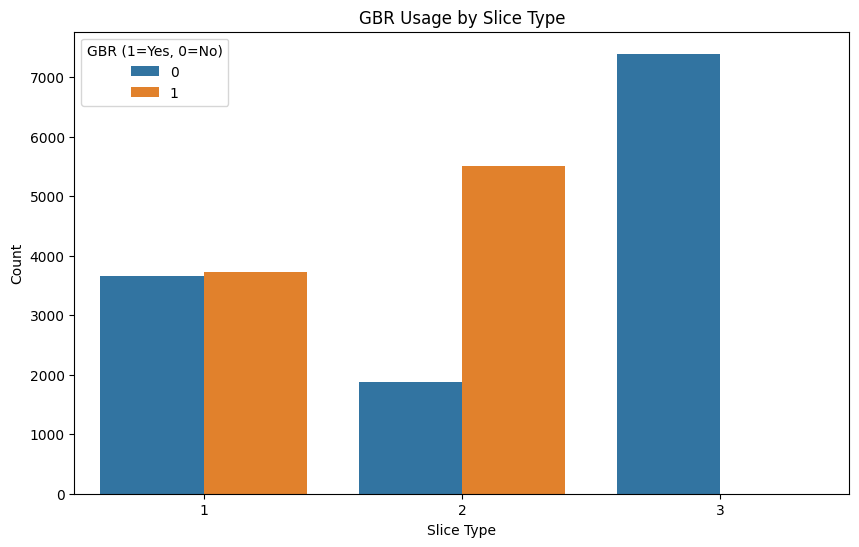

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='slice Type', hue='GBR')
plt.title("GBR Usage by Slice Type")
plt.xlabel("Slice Type")
plt.ylabel("Count")
plt.legend(title="GBR (1=Yes, 0=No)")
plt.xticks()
plt.show()

Slice Type 3 has no recorded values for GBR (Guaranteed Bit Rate) in the dataset, as confirmed by the analysis and visualized in the bar chart. This suggests that Slice Type 3 is not configured for services requiring a guaranteed bit rate, such as video streaming or voice services. Instead, Slice Type 3 may cater to best-effort services or applications where guaranteed throughput is not critical, such as IoT and smart city systems.

***Healthcare:***

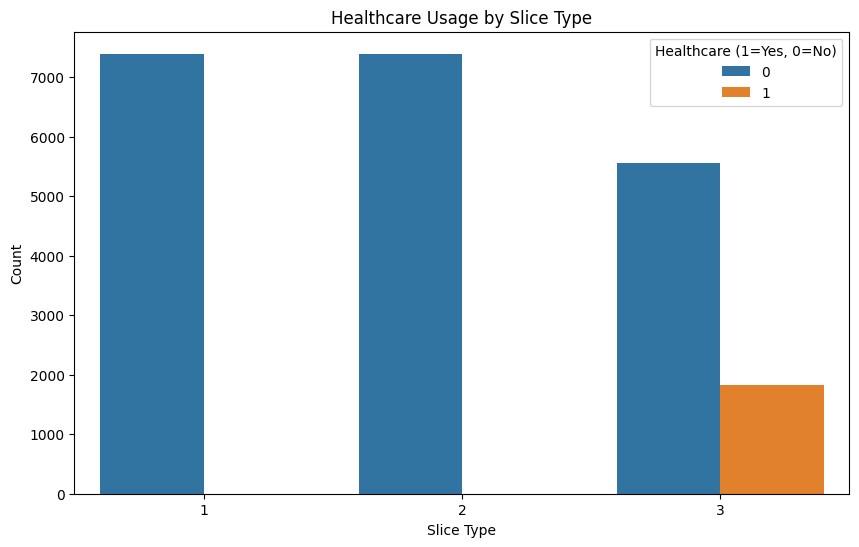

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='slice Type', hue='Healthcare')
plt.title("Healthcare Usage by Slice Type")
plt.xlabel("Slice Type")
plt.ylabel("Count")
plt.legend(title="Healthcare (1=Yes, 0=No)")
plt.xticks()
plt.show()

Healthcare applications are exclusively associated with Slice Type 3, as indicated by the data analysis where healthcare usage is absent from all other slice types. This suggests that Slice Type 3 is uniquely tailored to support healthcare services, likely due to its specific configurations such as low latency, high reliability, or other QoS (Quality of Service) requirements critical for medical applications

***Industry 4.0:***

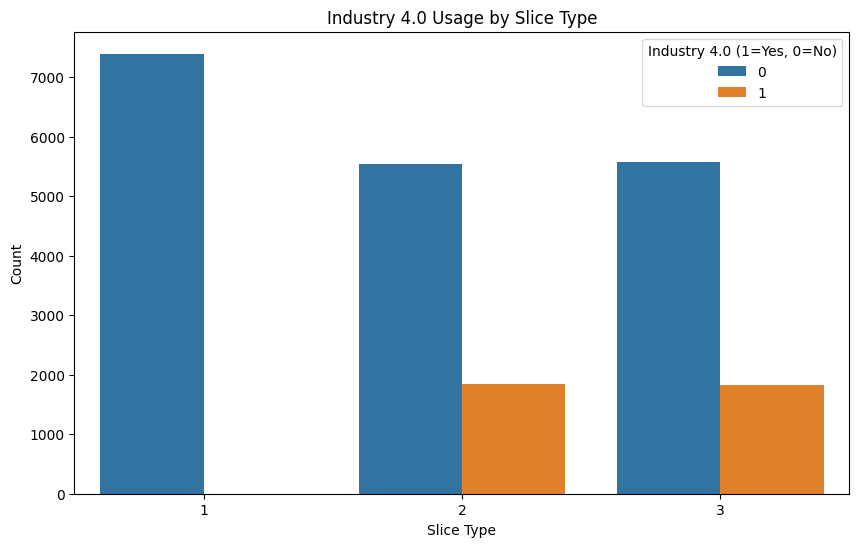

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='slice Type', hue='Industry 4.0')
plt.title("Industry 4.0 Usage by Slice Type")
plt.xlabel("Slice Type")
plt.ylabel("Count")
plt.legend(title="Industry 4.0 (1=Yes, 0=No)")
plt.xticks()
plt.show()

The absence of Industry 4.0 usage in Slice Type 1 could indicate that this slice type is reserved for services with simpler or less demanding connectivity requirements. Slice Types 2 and 3, on the other hand, likely have the technical configurations needed for Industry 4.0 applications, such as low latency, high reliability, or support for advanced IoT and automation systems.

***Internet of Things (IoT) Devices:***

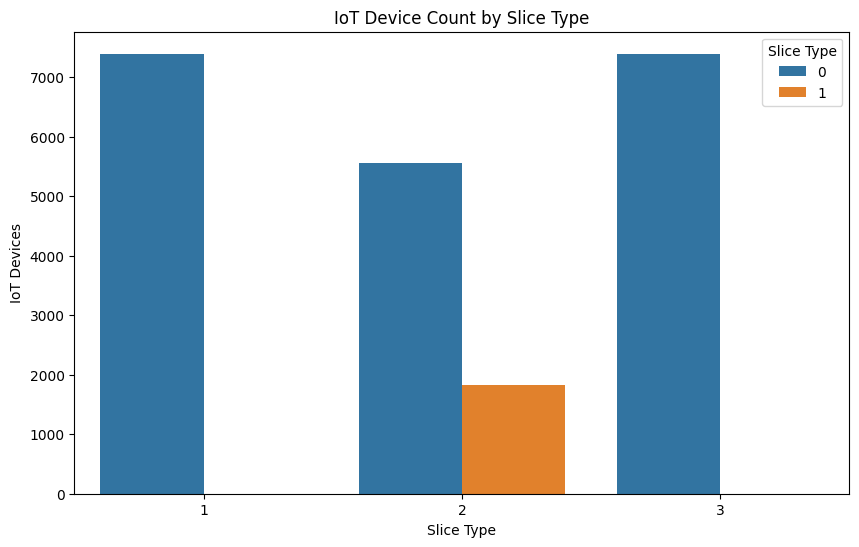

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='slice Type', hue='IoT Devices')
plt.title("IoT Device Count by Slice Type")
plt.xlabel("Slice Type")
plt.ylabel("IoT Devices")
plt.xticks()
plt.legend(title="Slice Type")
plt.show()

The analysis shows that IoT Devices are not utilized (IoT Devices = 0) in Slice Types 1 and 3, indicating that these slices are not configured to support IoT applications. However, Slice Type 2 exhibits both 0s and 1s, suggesting that it accommodates IoT use cases while still serving other application types.

***Public Safety:***

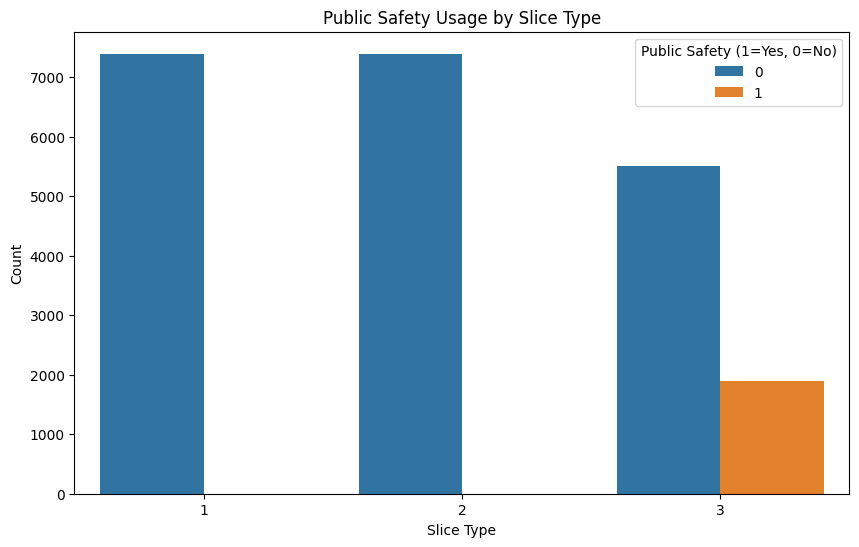

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='slice Type', hue='Public Safety')
plt.title("Public Safety Usage by Slice Type")
plt.xlabel("Slice Type")
plt.ylabel("Count")
plt.legend(title="Public Safety (1=Yes, 0=No)")
plt.xticks()
plt.show()

The presence of 1s in Slice Type 3 suggests that this slice type is specifically configured to support public safety applications, which may require high reliability, low latency, and network isolation for critical services. Slice Types 1 and 2, which lack Public Safety usage, are likely configured for other services that do not prioritize public welfare and safety.

***Smart City & Home:***

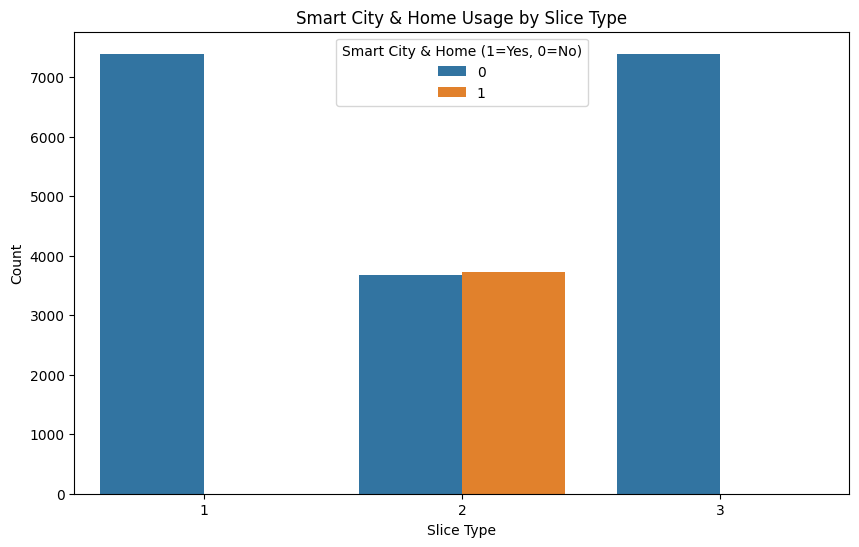

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='slice Type', hue='Smart City & Home')
plt.title("Smart City & Home Usage by Slice Type")
plt.xlabel("Slice Type")
plt.ylabel("Count")
plt.legend(title="Smart City & Home (1=Yes, 0=No)")
plt.xticks()
plt.show()

The presence of both 1s and 0s in Slice Type 2 suggests that this slice is configured to support smart city and home applications, such as smart home devices and urban infrastructure systems, which are often more flexible in terms of their network demands. On the other hand, Slice Types 1 and 3, which only have 0s, are likely optimized for other applications that do not include smart city or home services.

***Smart Transportation:***

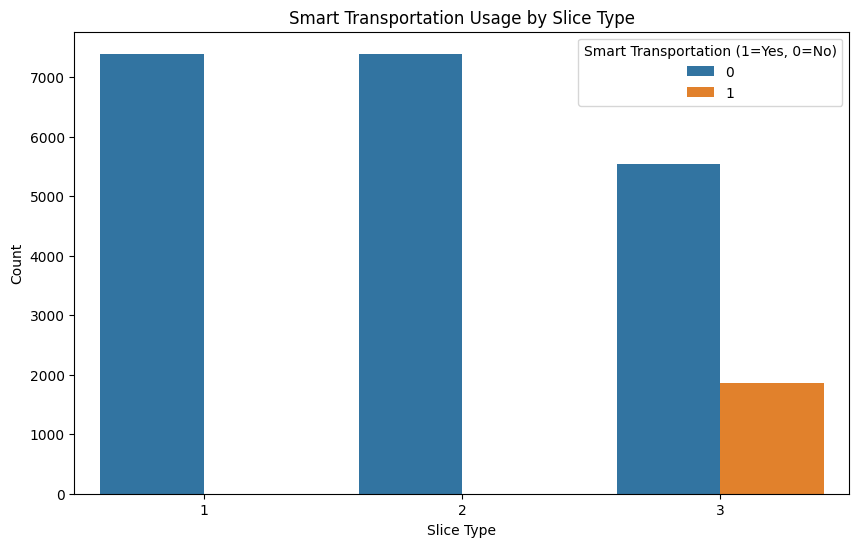

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='slice Type', hue='Smart Transportation')
plt.title("Smart Transportation Usage by Slice Type")
plt.xlabel("Slice Type")
plt.ylabel("Count")
plt.legend(title="Smart Transportation (1=Yes, 0=No)")
plt.xticks()
plt.show()

The presence of 1s for Smart Transportation in Slice Type 3 suggests that this slice is specifically tailored to support applications related to public transportation, such as smart vehicles, traffic management, or autonomous vehicles. Slice Types 1 and 2, which show only 0s for Smart Transportation, are likely optimized for other types of services that do not involve transportation-specific applications.

***Smartphone:***

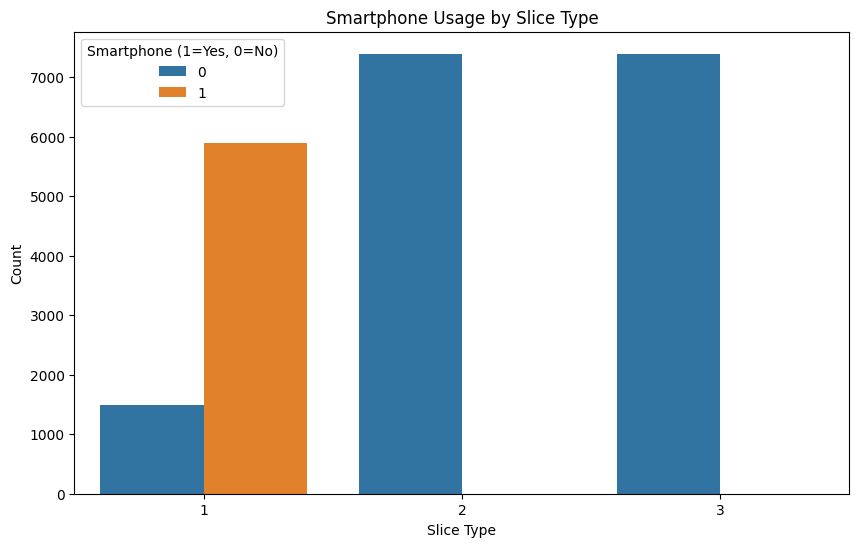

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='slice Type', hue='Smartphone')
plt.title("Smartphone Usage by Slice Type")
plt.xlabel("Slice Type")
plt.ylabel("Count")
plt.legend(title="Smartphone (1=Yes, 0=No)")
plt.xticks()
plt.show()

The presence of 1s for Smartphones in Slice Type 1 suggests that this slice is specifically designed to cater to mobile services that primarily support smartphones, such as voice and data services typically used by mobile users. On the other hand, Slice Types 2 and 3, which contain only 0s, are likely optimized for specialized services that do not rely on smartphones.

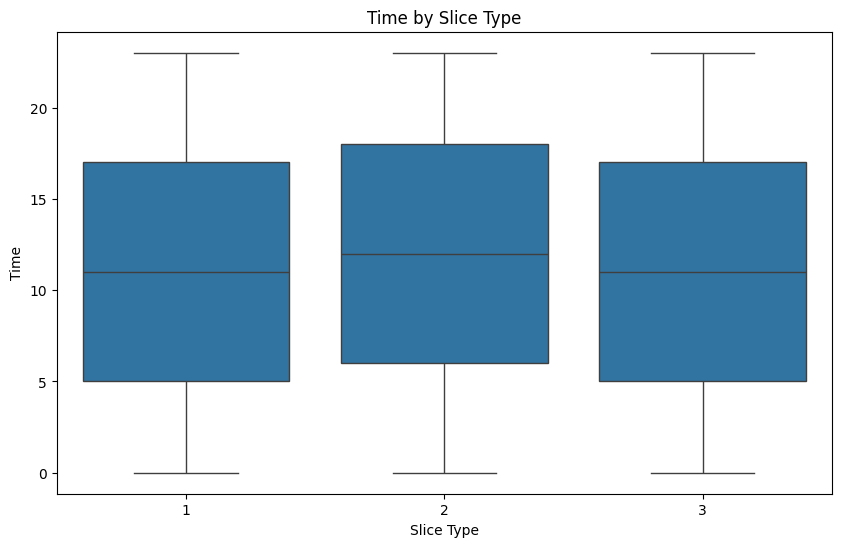

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=balanced_df, x='slice Type', y='Time')
plt.title("Time by Slice Type")
plt.xlabel("Slice Type")
plt.ylabel("Time")
plt.xticks()
plt.show()

From the boxplot of the Time column, we observe that the values are approximately the same for all slice types. This indicates that the distribution of Time is quite consistent across the different slice types, with no significant differences in median or spread between them.
The uniformity of the Time values across slice types suggests that the network slices are handling the time-related processes similarly, regardless of the slice configuration.

###***Plot the points in the plane:***###

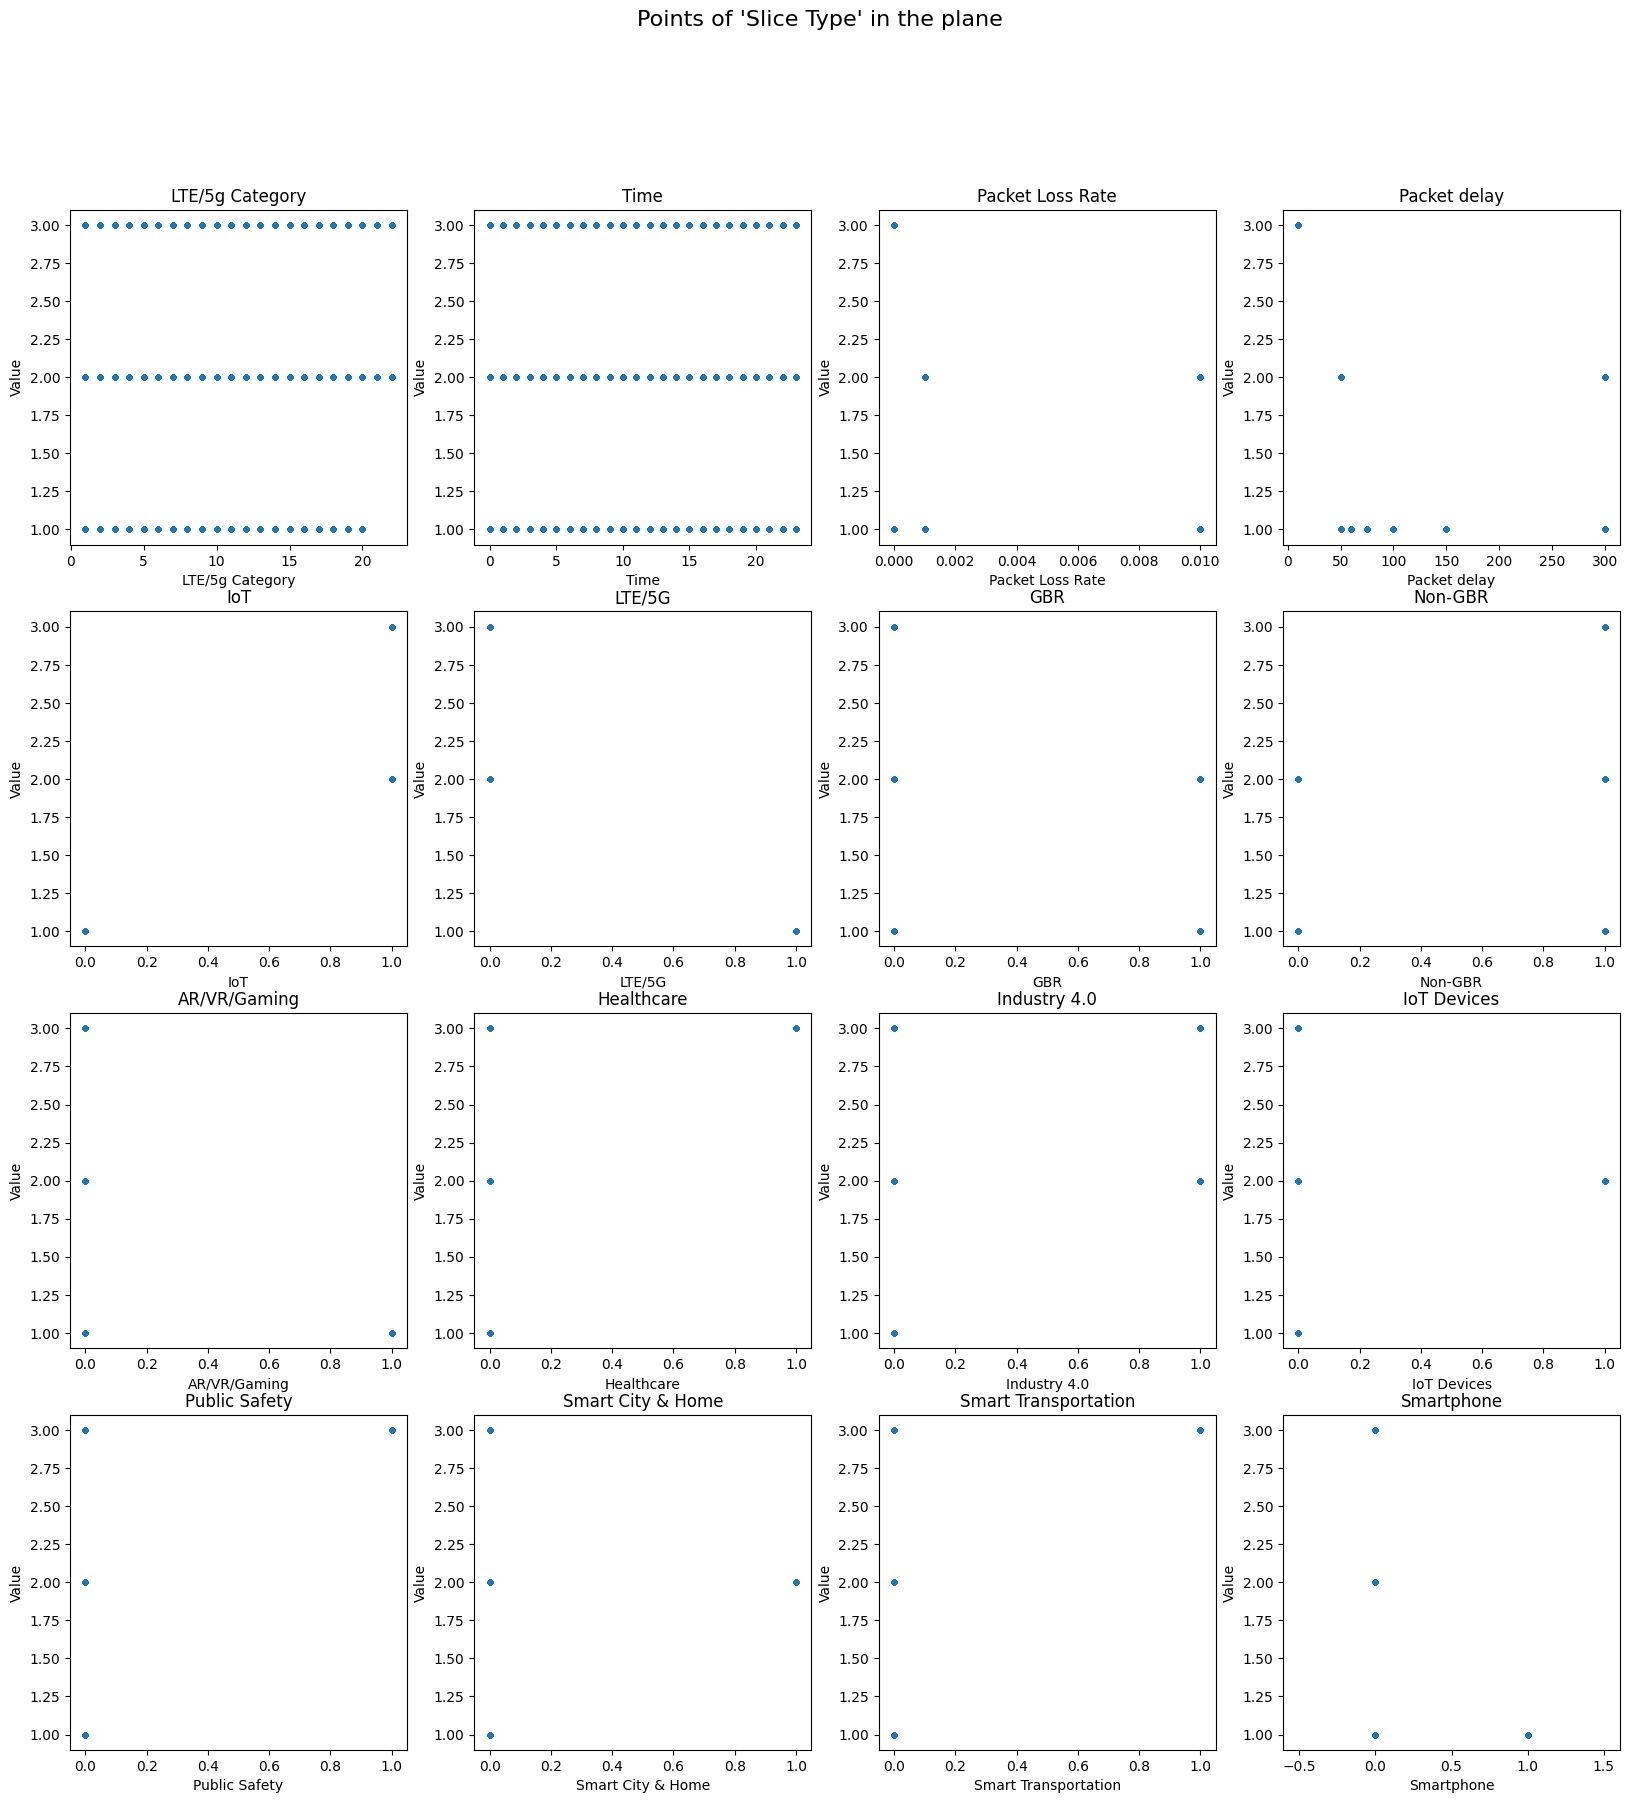

In [27]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 4x4 grid
axes = axes.flatten()

# Plot the points in the plane
for idx, col in enumerate(balanced_df.columns):
    if col == 'slice Type':
        continue

    ax = axes[idx]
    ax.plot(balanced_df[col],balanced_df['slice Type'],'.')
    plt.axis('equal')

    ax.set_title(f'{col}', fontsize=12)
    ax.set_ylabel('Value', fontsize=10)
    ax.set_xlabel(f'{col}', fontsize=10)

# Remove any unused subplots
for idx in range(len(balanced_df.columns), len(axes)):
    fig.delaxes(axes[idx])

# Show the plot
plt.suptitle(f"Points of 'Slice Type' in the plane", fontsize=16)
plt.show()

###***Compute the covariance:***###
Cov(X,Y) = E(XY) - E(X)E(Y)

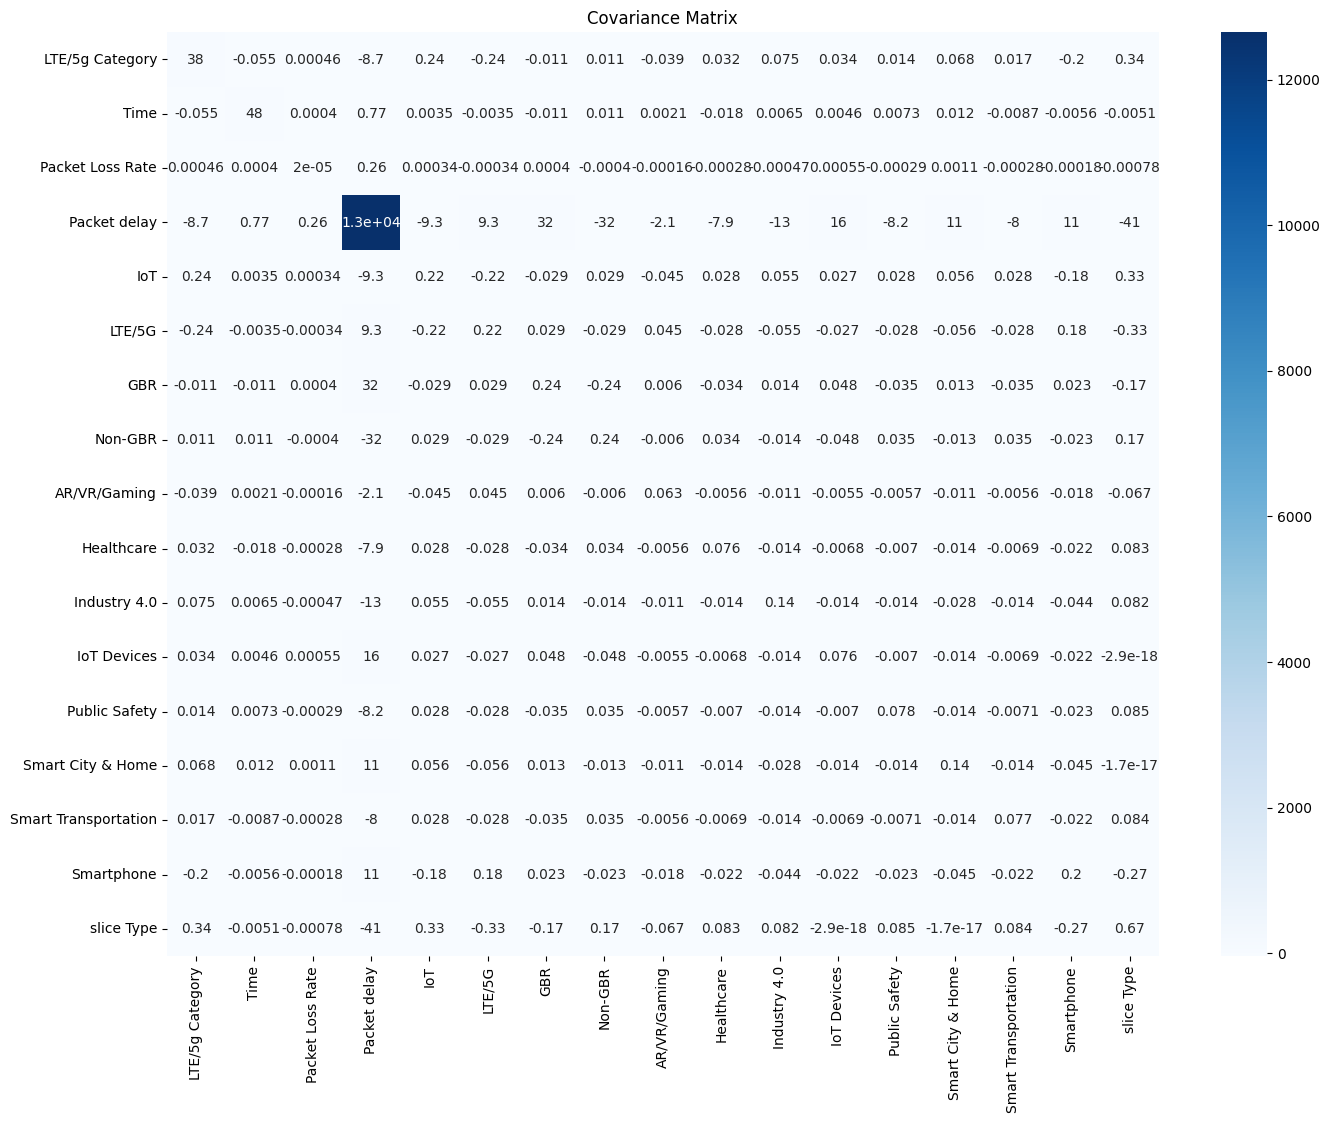

In [28]:
# Calculate the covariance
fig = plt.figure(figsize = (16,12))
cov_matrix = balanced_df.cov()
sns.heatmap(cov_matrix, cmap='Blues', annot=True)
plt.title("Covariance Matrix")
plt.show()

###***Key notes from the Covariance values:***###
1. Covariance between 'slice Type' and 'LTE/5g Category' (0.342):
A moderate positive covariance suggests that higher 'slice Type' values are associated with higher 'LTE/5g Category' values, indicating a potential alignment between these variables.

2. Covariance between 'slice Type' and 'Time' (-0.005):
The near-zero negative covariance indicates almost no linear relationship, implying that variations in 'Time' have negligible impact on 'slice Type.'

3. Covariance between 'slice Type' and 'Packet Loss Rate' (-0.0008):
A very weak negative covariance suggests little to no relationship, with marginal inverse trends between these variables.

4. Covariance between 'slice Type' and 'Packet delay' (-41.31):
The large negative covariance highlights a strong inverse relationship, where higher 'slice Type' values are linked to lower 'Packet delay,' suggesting a prioritization of low latency in specific slice types.

5. Covariance between 'slice Type' and 'IoT' (0.333):
A moderate positive covariance indicates a strong association, reflecting that certain slice types may cater specifically to IoT applications.

6. Covariance between 'slice Type' and 'LTE/5G' (-0.333):
The negative covariance suggests an inverse relationship, indicating that higher values of 'slice Type' correspond to lower relevance for 'LTE/5G' services.

7. Covariance between 'slice Type' and 'GBR' (-0.168):
The negative covariance suggests that 'slice Type' tends to align less with guaranteed bit rate services.

8. Covariance between 'slice Type' and 'Non-GBR' (0.168):
A positive covariance indicates a preference for non-guaranteed bit rate services in specific slice types.

9. Covariance between 'slice Type' and 'AR/VR/Gaming' (-0.067):
The weak negative covariance implies that 'slice Type' is slightly less aligned with AR/VR/Gaming applications.

10. Covariance between 'slice Type' and 'Healthcare' (0.083):
A small positive covariance shows a slight association, suggesting certain slice types may support healthcare use cases.

11. Covariance between 'slice Type' and 'Industry 4.0' (0.082):
A similar small positive covariance indicates limited but present alignment with Industry 4.0 needs.

12. Covariance between 'slice Type' and 'IoT Devices' (0.0):
Zero covariance suggests no linear relationship, implying that 'IoT Devices' and 'slice Type' are independent.

13. Covariance between 'slice Type' and 'Public Safety' (0.085):
The mild positive covariance reflects slight alignment with public safety requirements, potentially indicative of specific design considerations.

14. Covariance between 'slice Type' and 'Smart City & Home' (0.0):
Zero covariance suggests no direct relationship between these variables, indicating independence.

15. Covariance between 'slice Type' and 'Smart Transportation' (0.084):
A mild positive covariance shows limited association, hinting at some overlap between 'slice Type' and smart transportation priorities.

16. Covariance between 'slice Type' and 'Smartphone' (-0.266):
The negative covariance indicates that higher 'slice Type' values are associated with reduced relevance of smartphones, suggesting other devices may dominate these slice types.

17. Covariance between 'slice Type' and itself (0.667):
This is the variance of 'slice Type,' representing its inherent variability and serving as a baseline for comparisons.

###***Correlation between the column of the dataset:***###

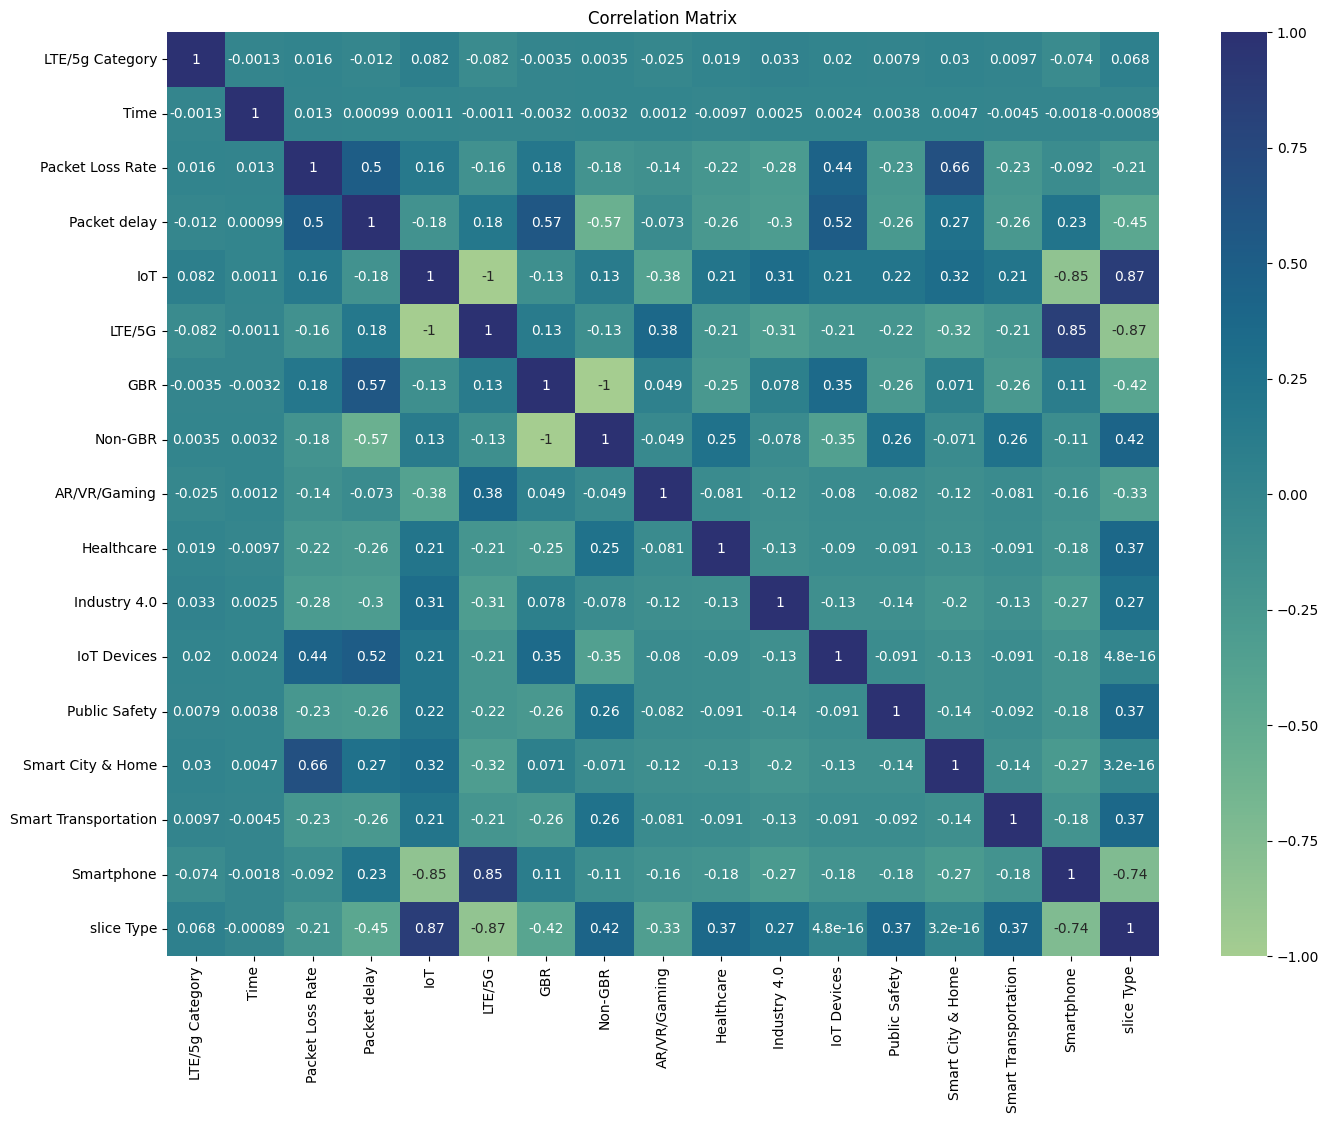

In [29]:
# Now we calculate the correlation
fig = plt.figure(figsize = (16,12))
corr_results = balanced_df.corr()
sns.heatmap(corr_results, annot = True,cmap="crest")
plt.title("Correlation Matrix")
plt.show()

***1. High Correlations (>|0.55|):***
* IoT and Slice Type (0.87): Strong positive correlation shows that IoT devices are heavily aligned with specific slice types, indicating prioritization in network configurations.
* Smartphone and LTE/5G (0.85): High positive correlation highlights that LTE/5G is closely associated with smartphone usage.
* Packet Loss Rate and Smart City & Home (0.66): Strong positive correlation suggests that packet loss may significantly impact smart city and home applications.
* IoT and LTE/5G (-1.00): Perfect negative correlation implies that IoT usage is inversely related to LTE/5G, possibly reflecting distinct technical or application domains.
* GBR and Non-GBR (-1.00): Inverse relationship as expected, given their mutually exclusive definitions.

***2. Moderate Correlations (|0.3| to |0.55|):***
* IoT Devices and Packet Delay (0.52): Moderate positive correlation indicates that delay might significantly affect IoT devices.
* Industry 4.0 and Slice Type (0.27): A moderate positive correlation suggests alignment of certain slice types with industrial applications.
* Slice Type and Public Safety (0.37): Indicates some slice types may be tailored for public safety use cases.

***3. Weak Correlations (<|0.3|):***
* AR/VR/Gaming and Slice Type (-0.33): Weak negative correlation shows that these services are deprioritized in certain slice types.
* Healthcare and Industry 4.0 (0.21): Shows slight overlap in resource allocation for healthcare and industrial applications.
* Time and all other variables: Time has negligible correlation across the board, suggesting no significant temporal trends.


***Things to extract features:***
1. Remove the 'Time' feature. It has a very small correlation coefficient.
2. Remove the 'IoT' feature. 'IoT' and 'LTE/5G Category' have inverted correlation coefficients.
3. Remove the 'Non-GBR' feature. The 'GBR' feature is the inverted counterpart of the 'Non-GBR' feature, so there is no need to keep it.

In [30]:
balanced_df.drop(columns = ["Time","IoT","Non-GBR"],inplace = True)
balanced_df.head()

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
9283,17,0.000001,60,1,1,0,0,0,0,0,0,0,1,1
15411,17,0.010000,100,1,0,0,0,0,0,0,0,0,1,1
22506,13,0.010000,75,1,0,0,0,0,0,0,0,0,1,1
15968,4,0.010000,100,1,0,0,0,0,0,0,0,0,1,1
9548,10,0.001000,100,1,1,0,0,0,0,0,0,0,1,1


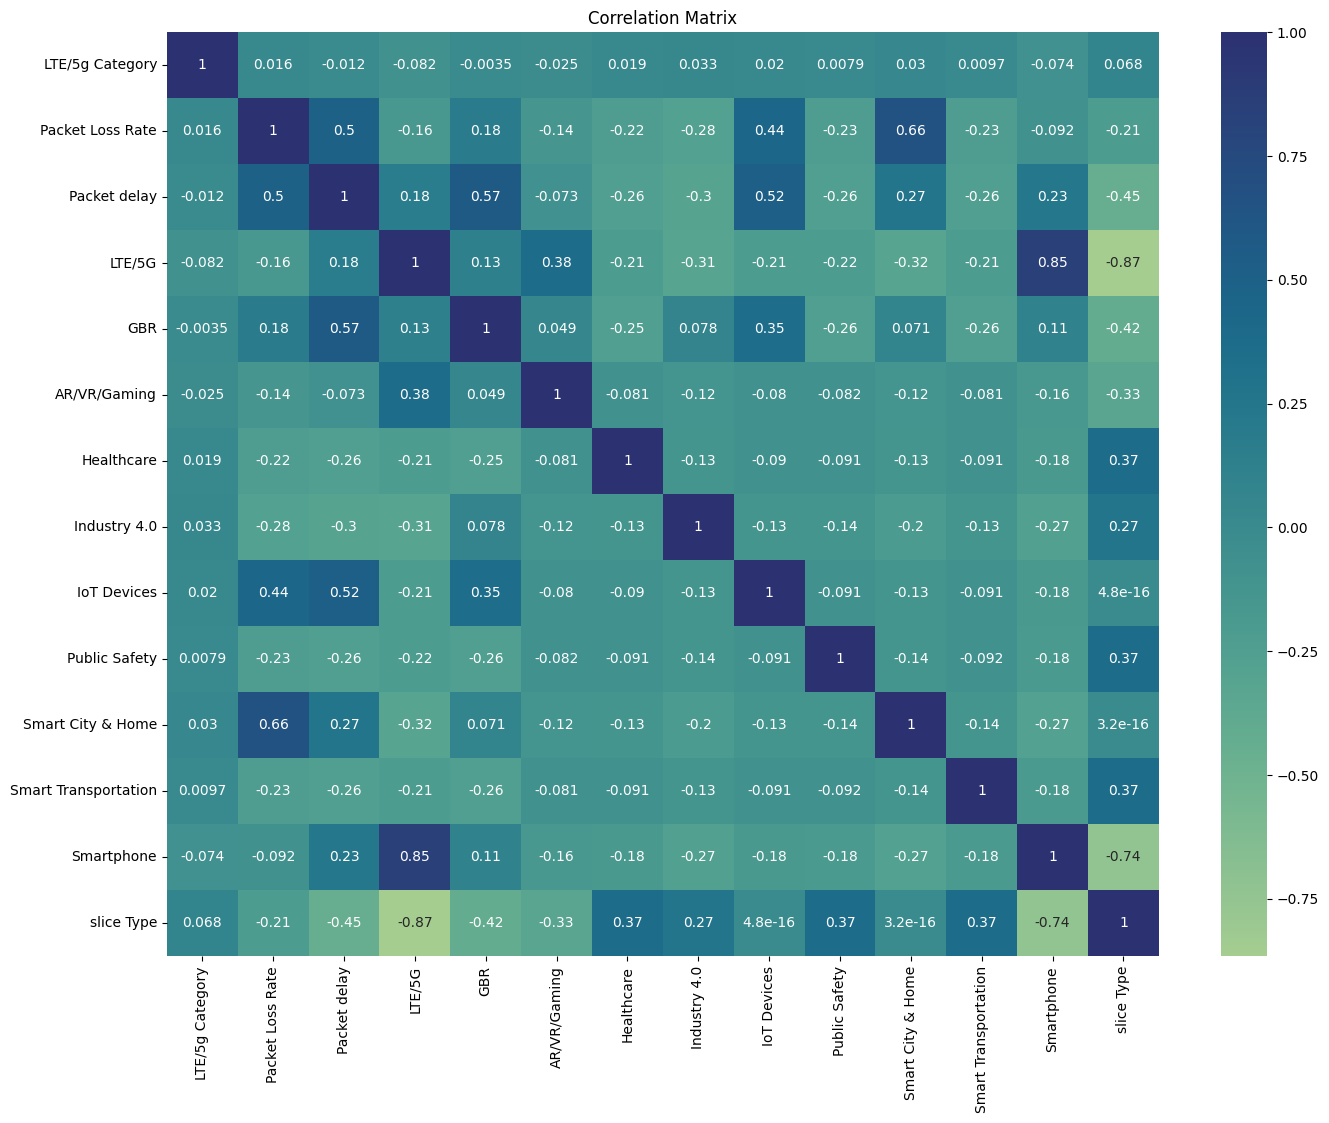

In [31]:
#now we calculate the correlation after dropping "Time","IoT","Non-GBR"
fig = plt.figure(figsize = (16,12))
corr_results = balanced_df.corr()
sns.heatmap(corr_results, annot = True,cmap="crest")
plt.title("Correlation Matrix")
plt.show()

<Figure size 1400x800 with 0 Axes>

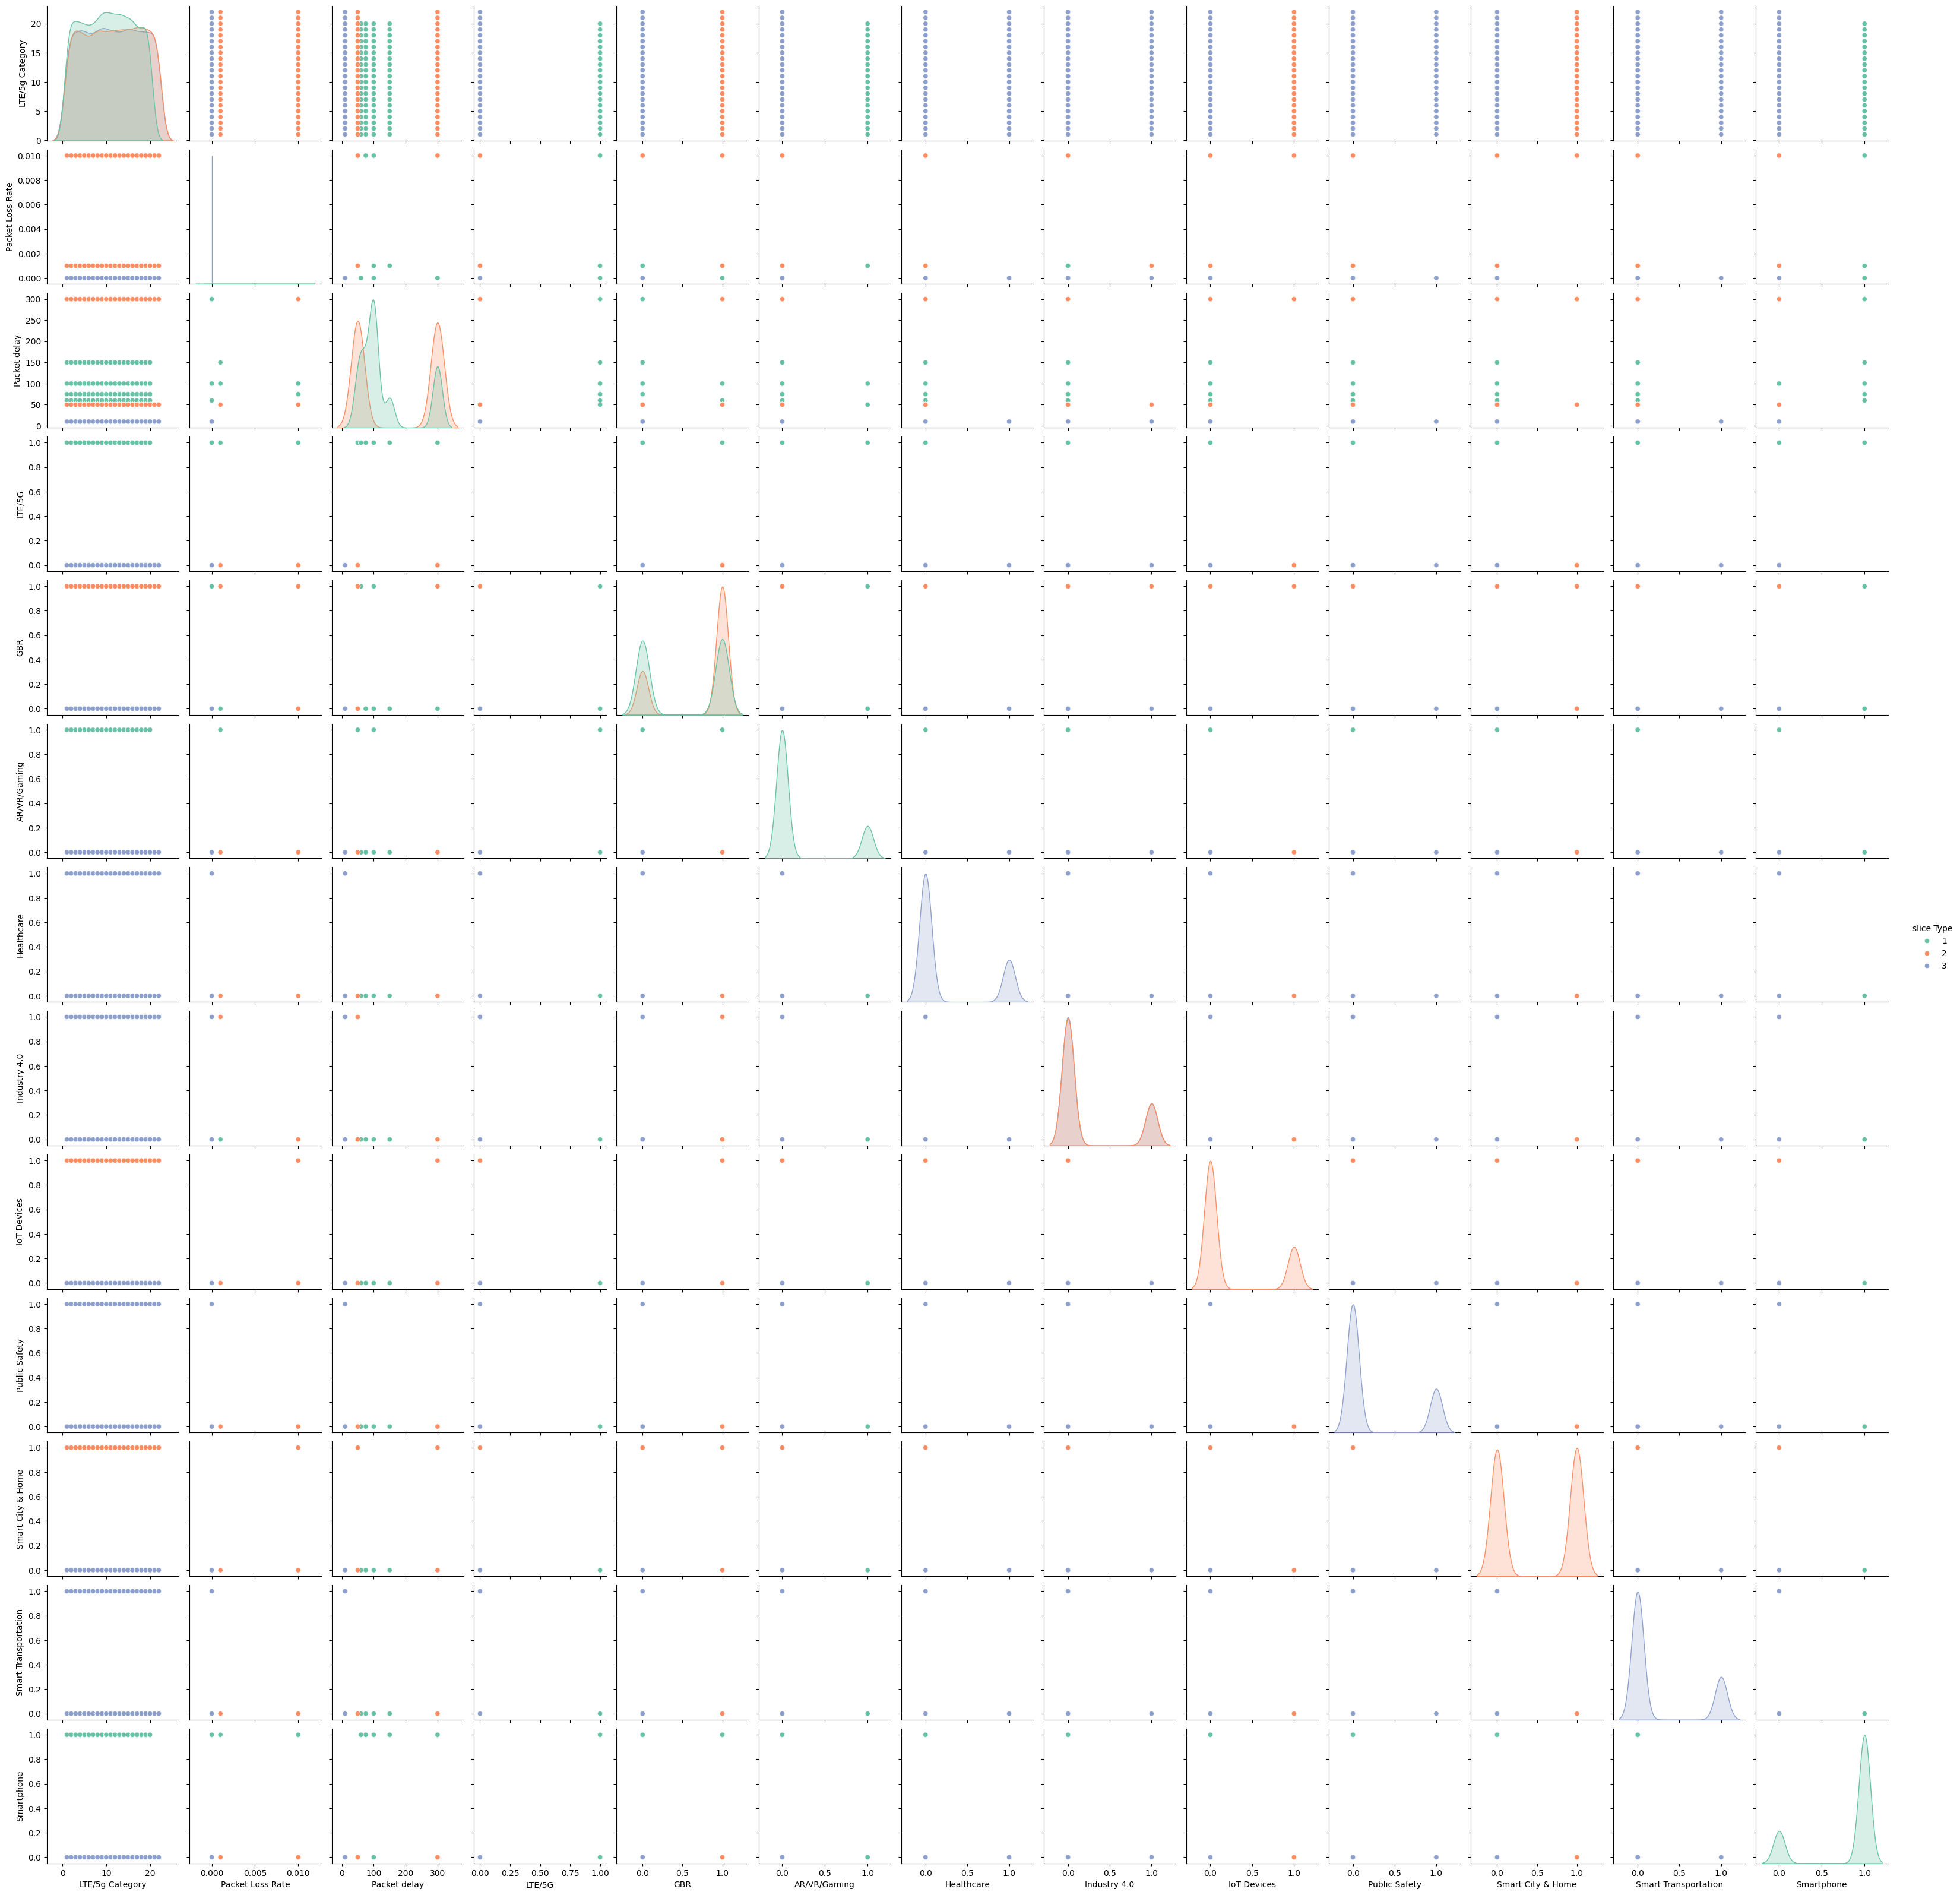

In [32]:
plt.figure(figsize=(14, 8))
# Create a pair plot
sns.pairplot(data=balanced_df, hue='slice Type', diag_kind='kde', palette='Set2')

# Show the plot
plt.show()

# ***Testing different Machine Learning models to predict the Slice type:***

###***Split Dataset into Train_dataset and Test_dataset:***###
Train_dataset will be 70% of the full dataset and Test_dataset will be 30%.

In [33]:
X=balanced_df.drop(columns = ["slice Type"])
y=balanced_df['slice Type']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=43,test_size= 0.3)

###***Logistic Regression (LR):***###
testing the logistic regression model to predict the slice type. Note: we do not check the $R^2$ score since Logistic regression is a classification model.
Firstly, we train a univariate logistic regression for each feature separately, and measure its cross-entropy (using log-loss).

In [34]:
log_reg_model = LogisticRegression()

regression_results = {}

for column in X.columns:
    x_train_column = X_train[[column]]
    x_test_column = X_test[[column]]

    log_reg_model.fit(x_train_column, Y_train)
    yhat = log_reg_model.predict(x_test_column) #prediction setp

    yhat_prob = log_reg_model.predict_proba(x_test_column) #probabilty prediction setp
    ce_uni = log_loss(Y_test, yhat_prob) * len(Y_test)
    print(f"{column}:   Cross Entropy = {ce_uni:.4f}")


LTE/5g Category:   Cross Entropy = 7288.9398
Packet Loss Rate:   Cross Entropy = 6995.3814
Packet delay:   Cross Entropy = 3010.5898
LTE/5G:   Cross Entropy = 3094.8020
GBR:   Cross Entropy = 5574.4533
AR/VR/Gaming:   Cross Entropy = 6780.3611
Healthcare:   Cross Entropy = 6651.8530
Industry 4.0:   Cross Entropy = 6818.3131
IoT Devices:   Cross Entropy = 6656.8359
Public Safety:   Cross Entropy = 6669.2618
Smart City & Home:   Cross Entropy = 5819.1106
Smart Transportation:   Cross Entropy = 6629.8944
Smartphone:   Cross Entropy = 4592.7275


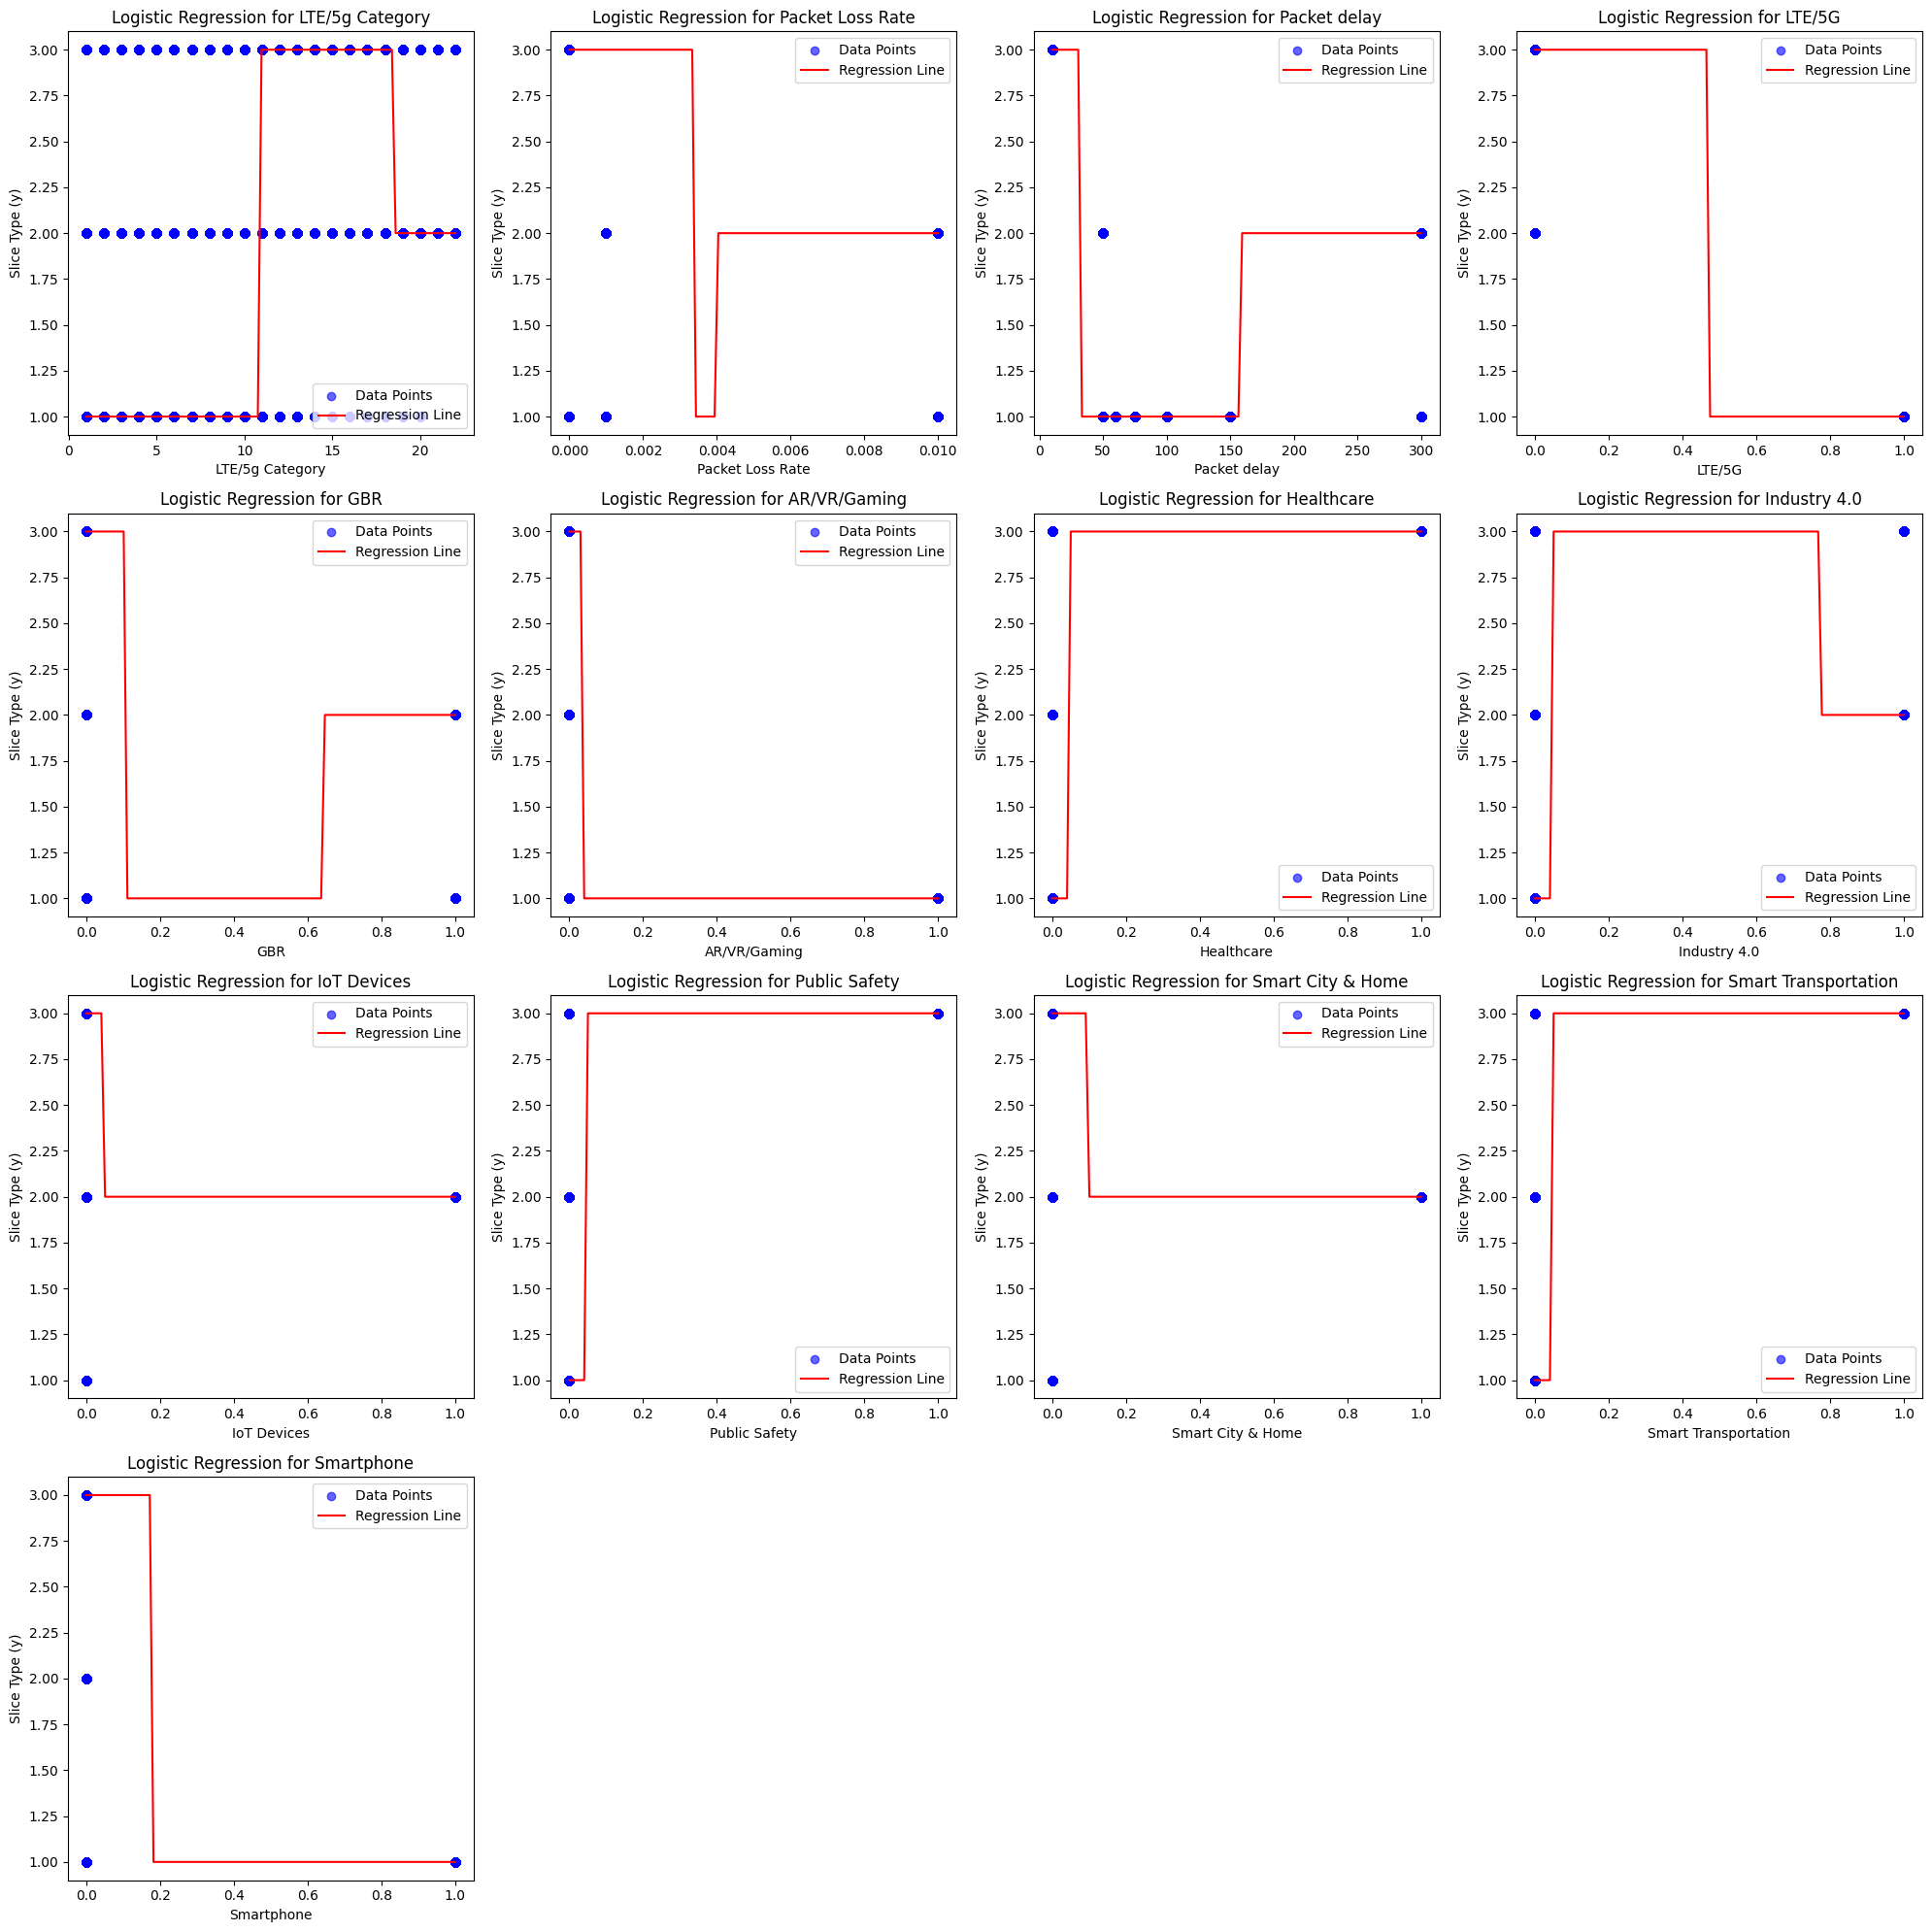

In [35]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 4x4 grid
axes = axes.flatten()


for i, column in enumerate(X_train.columns):
    ax = axes[i]

    # Get feature and target values
    feature = X_train[column].values.reshape(-1, 1)
    target = Y_train.values

    # Fit linear regression for this feature
    model = LogisticRegression()
    model.fit(feature, target)

    # Generate predictions for the regression line
    feature_range = np.linspace(feature.min(), feature.max(), 100).reshape(-1, 1)
    predictions = model.predict(feature_range)

    ax = axes[i]
    # Scatter plot of the data points
    ax.scatter(feature, target, color='blue', alpha=0.6, label='Data Points')

    # Plot regression line
    ax.plot(feature_range, predictions, color='red', label='Regression Line')

    # Add labels and legend
    ax.set_title(f'Logistic Regression for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Slice Type (y)')
    ax.legend()

# Remove any unused subplots
for idx in range(len(balanced_df.columns)-1, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Secondly, we train a multivariate logistic regression and measure its cross-entropy (on the full data set).

In [36]:
# Step 1: Scale the data to improve convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the Logistic Regression model with multiclass settings
model = LogisticRegression( C=0.1, solver='lbfgs', max_iter=5000) #C=0.1 is to regularize the model to avoid overfitting
model.fit(X_train_scaled, Y_train)

# Step 3: Predict probabilities for all classes
yhat_prob_multi = model.predict_proba(X_test_scaled)  # Shape: (n_samples, n_classes)

# Step 4: Calculate cross-entropy (log-loss)
ce_multi = log_loss(Y_test, yhat_prob_multi)
print(f"Cross-Entropy of the Multiclass Logistic Regression = {ce_multi:.4f}")


Cross-Entropy of the Multiclass Logistic Regression = 0.0026


Cross-entropy is low, indicating strong model performance overall.

###***Decision Tree Model:***###

In [37]:
# Train a Decision Tree model
model = DecisionTreeClassifier(criterion="log_loss")
model.fit(X_train, Y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)  # Predict probabilities for Log-Loss

# Evaluate model performance
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test), multi_class='ovr')  # AUC for multiclass

# Calculate Log-Loss (cross-entropy)
log_loss_value = log_loss(Y_test, y_pred_prob)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Log-Loss (Cross-Entropy): {log_loss_value:.4f}")


Accuracy: 1.0000
Confusion Matrix:
[[2201    0    0]
 [   0 2269    0]
 [   0    0 2183]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2201
           2       1.00      1.00      1.00      2269
           3       1.00      1.00      1.00      2183

    accuracy                           1.00      6653
   macro avg       1.00      1.00      1.00      6653
weighted avg       1.00      1.00      1.00      6653

ROC AUC: 1.0000
Log-Loss (Cross-Entropy): 0.0000


We can interpret that the model has achieved 100% accuracy, with perfect precision, recall, and F1-scores for all classes. The ROC AUC score of 1.0 further confirms that the model is able to perfectly distinguish between the classes.

During the initial training, the model was performing almost too well — with perfect accuracy and zero log-loss — which raised a question mark. After checking the feature correlations, we found that some features were very strongly related to the target labels. These features (like LTE/5G, Smartphone, Packet delay, and GBR) were likely giving the model direct clues about the correct class, which can lead to overly optimistic results that don’t reflect real-world performance.

To avoid this kind of data leakage, we removed those high-correlation features from the dataset. This allowed the model to learn from more subtle patterns rather than relying on features that essentially 'give away' the answer. As expected, accuracy dropped to a more realistic level, which gave us a better sense of how the model would perform on truly unseen data.

Fold 1: Accuracy = 0.5699, Log-Loss = 0.8097, ROC AUC = 0.7193
Fold 2: Accuracy = 0.5727, Log-Loss = 0.8061, ROC AUC = 0.7216
Fold 3: Accuracy = 0.5565, Log-Loss = 0.8261, ROC AUC = 0.7084
Fold 4: Accuracy = 0.5626, Log-Loss = 0.8192, ROC AUC = 0.7131
Fold 5: Accuracy = 0.5723, Log-Loss = 0.8075, ROC AUC = 0.7209


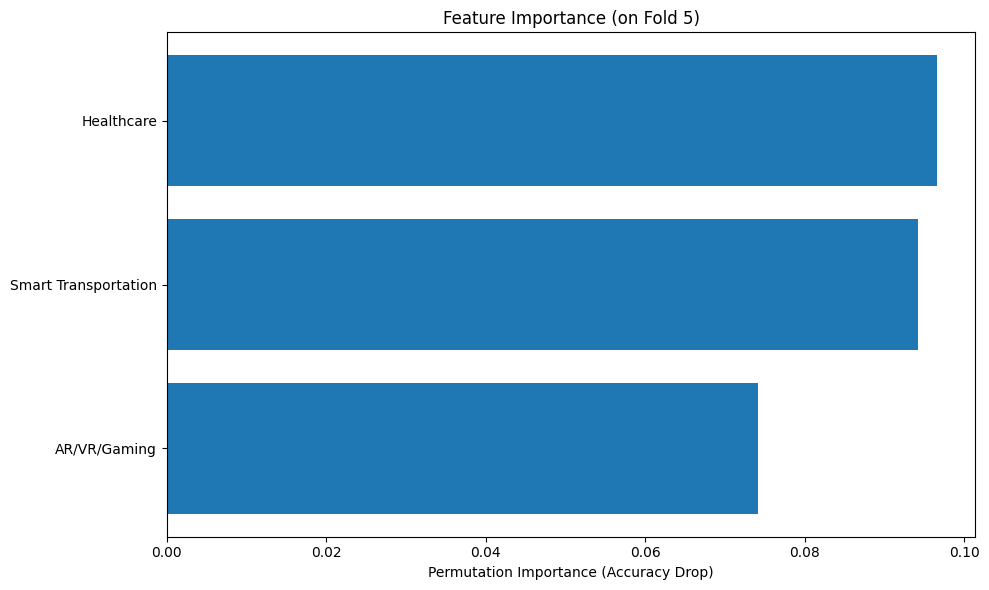


=== Cross-Validation Summary ===
Average Accuracy: 0.5668
Average Log-Loss: 0.8137
Average ROC AUC: 0.7167


In [38]:
# --- Step 1: Select the features ---
minimal_features = ["AR/VR/Gaming", "Smart Transportation", "Healthcare"]
X_minimal = X[minimal_features]

# --- Step 2: Scale the features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_minimal)

# --- Step 3: Setup for k-fold cross-validation ---
y = y.reset_index(drop=True)  # Ensure index alignment
X_minimal = X_minimal.reset_index(drop=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
log_losses = []
roc_aucs = []

# --- Step 4: Cross-validation loop ---
for fold, (train_idx, test_idx) in enumerate(skf.split(X_scaled, y), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = DecisionTreeClassifier(criterion="log_loss", random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    ce = log_loss(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    accuracies.append(acc)
    log_losses.append(ce)
    roc_aucs.append(auc)

    print(f"Fold {fold}: Accuracy = {acc:.4f}, Log-Loss = {ce:.4f}, ROC AUC = {auc:.4f}")

    # --- Step 5: Permutation importance on final fold only ---
    if fold == 5:
        result = permutation_importance(
            model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy'
        )
        sorted_idx = result.importances_mean.argsort()[::-1]

        # Plot permutation importances
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), [X_minimal.columns[i] for i in sorted_idx])
        plt.xlabel("Permutation Importance (Accuracy Drop)")
        plt.title("Feature Importance (on Fold 5)")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

# --- Step 6: Final average results ---
print("\n=== Cross-Validation Summary ===")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Log-Loss: {np.mean(log_losses):.4f}")
print(f"Average ROC AUC: {np.mean(roc_aucs):.4f}")

After observing perfect accuracy in early experiments, we suspected that some features were leaking target information. We re-trained the model using only three low-correlation features to ensure fair evaluation. As expected, model performance dropped to more realistic levels (≈57% accuracy, 0.81 log-loss), confirming the presence of prior leakage. The remaining features — Smart Transportation, Healthcare, and AR/VR/Gaming — still showed meaningful influence, suggesting the model could learn some valid patterns even from a limited, cleaner feature set.

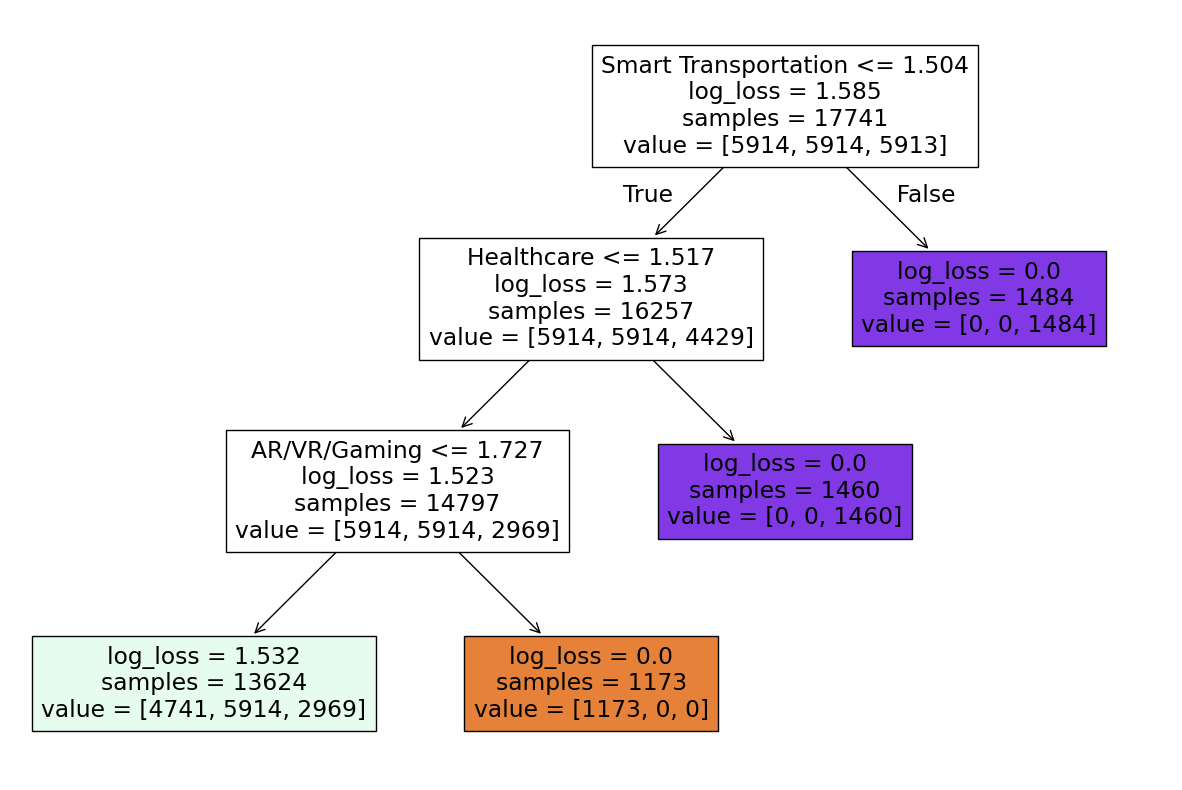

In [40]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names = list(X_minimal.columns ), filled=True )
plt.savefig('out.pdf')
plt.show()

The decision tree uses just three features (Smart Transportation, Healthcare, and AR/VR/Gaming) to separate the dataset into class-pure and mixed regions. Some leaf nodes show perfect classification (log loss = 0.0), indicating that the selected features carry strong predictive signals. The tree’s structure also confirms the high importance of these features as they consistently appear near the root of the tree. However, not all splits lead to pure subsets, which reflects the model's natural limitations with overlapping feature values.